In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
import shap
import math
df=pd.read_csv('myInput/reduced_phases.csv')
df.drop(columns=['0'],axis=1,inplace=True)
df=df.dropna()
df=df.drop_duplicates()

Text(198.56944444444443, 0.5, 'YS_MPa')

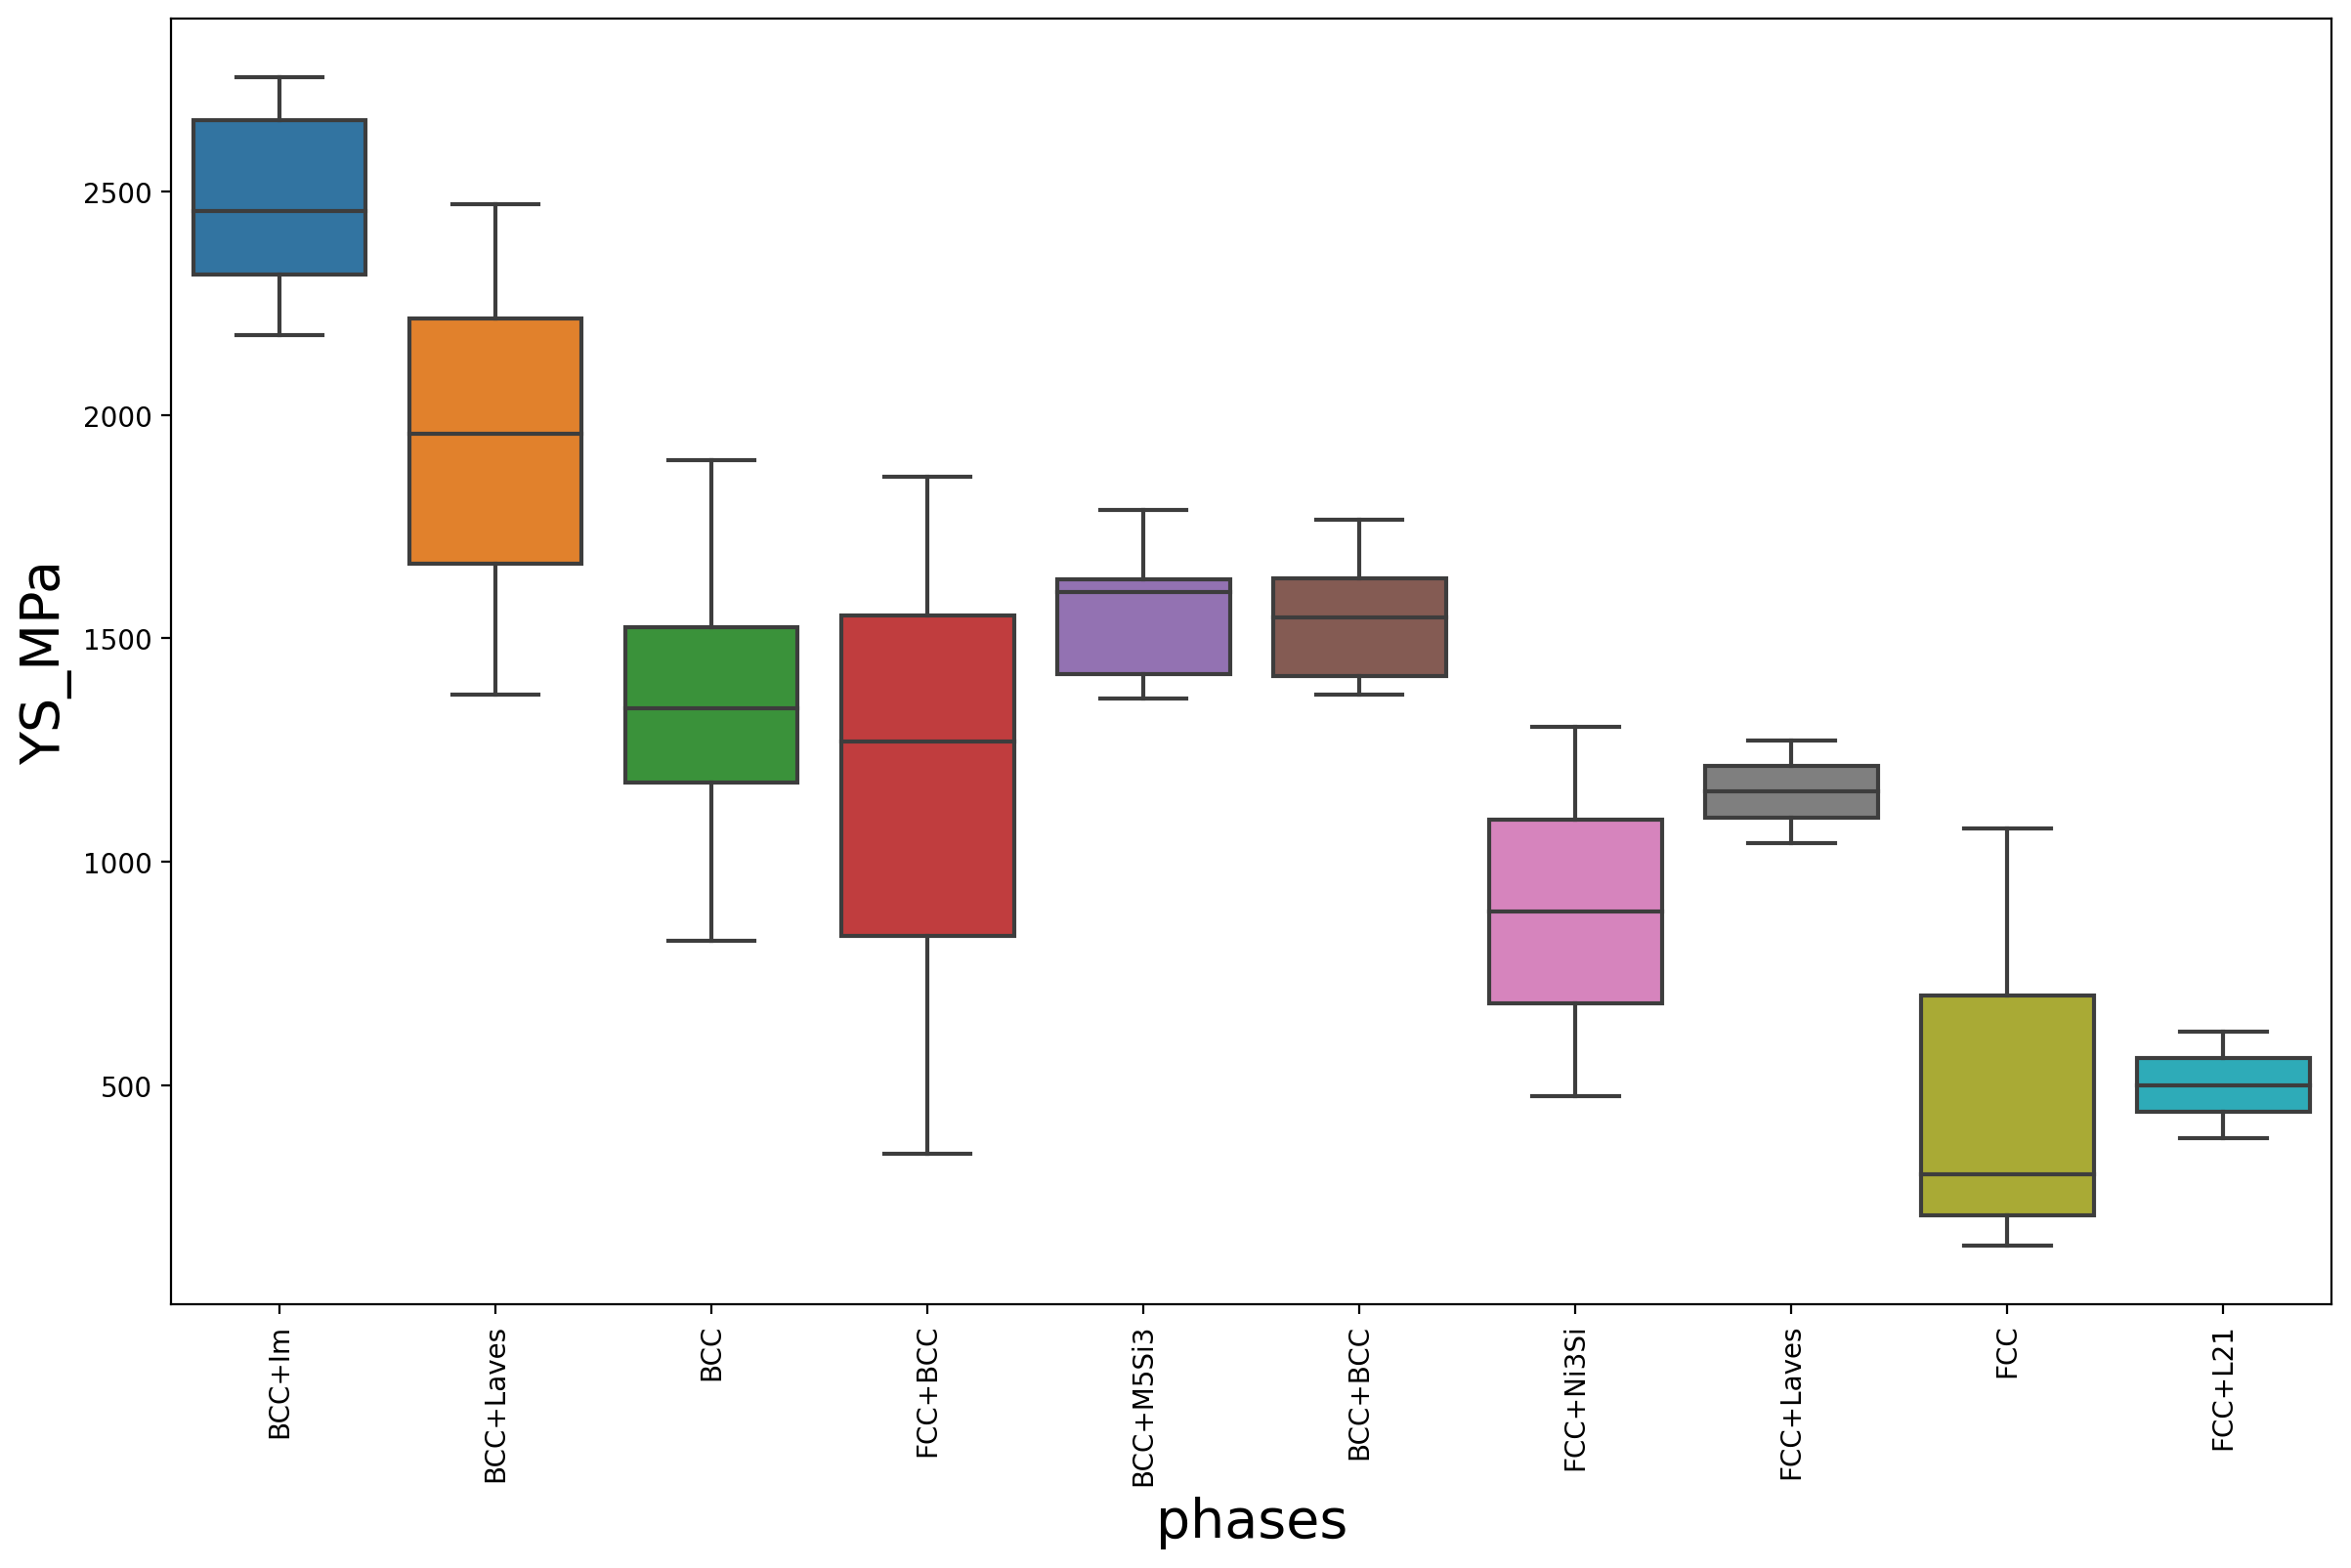

In [2]:
plt.figure(figsize=(12,8),dpi=200)
# sns.scatterplot(x=df['R_delta'],y=df['YS_MPa'],style=df['phases'],hue=df['phases'],size=df['phases'],palette='Set2')

plt.xticks(rotation=90)
sns.boxplot(x=df['phases'],y=df['YS_MPa'])
plt.tight_layout()
plt.xlabel('phases',size=20)
plt.ylabel('YS_MPa',size=20)
#plt.savefig("output.png")

In [3]:
from numpy import mean
from numpy import std
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
y=df['YS_MPa']
rfe=RFE(estimator=DecisionTreeRegressor(),n_features_to_select=10)
rfe.fit(X,y)
features,isSelected,ranking=list(),list(),list()
for i in range(len(X.columns.tolist())):
    features.append(X.columns.tolist()[i])
    isSelected.append(rfe.support_[i])
    ranking.append(rfe.ranking_[i])
    #print(f'ColumnName:{X.columns.tolist()[i]},Selected:{rfe.support_[i]},Ranking:{rfe.ranking_[i]}')
result_df=pd.DataFrame(data=[[features[i],isSelected[i],ranking[i]] for i in range(len(features))],columns=['Features','isSelected','ranking'])
result_df=result_df.sort_values(by='ranking',ascending=True)
result_df.set_index('Features')

isSelected  ranking
Features                           
R_delta               True        1
S_config              True        1
VEC                   True        1
R_cov_delta           True        1
density_avg           True        1
Compress_delta        True        1
B_delta               True        1
E_delta               True        1
G_avg                 True        1
H_ch_M_L_R            True        1
H_el_M_S_R           False        2
Vm_delta             False        3
Senkov_param         False        4
Compress_avg         False        5
H_avg                False        6
B_avg                False        7
E_coh_delta          False        8
E_coh_avg            False        9
Tm_avg               False       10
E_avg                False       11
G_delta              False       12
EN_Allen_avg         False       13

In [4]:
df2=df

RMS error= 220.27153483798142
Absolute Error= 172.19505586932453
21


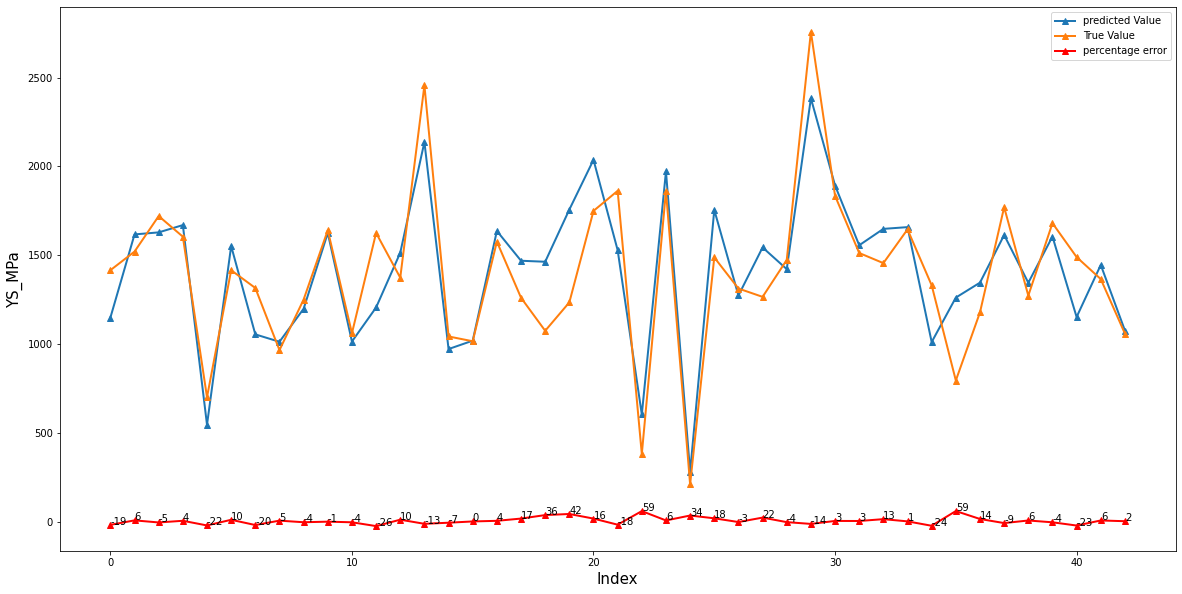

In [5]:
df=df2
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000,max_features=9)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')

error=(predict-y_test)*100/y_test

n=y_test.shape[0]
print(i)

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)
#plt.hline(0,range(0,4n4))
# for i in range(0,44):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300)

In [6]:
feat='Compress_avg'
df.corr().sort_values(by=[feat],ascending=False)[feat]

Compress_avg      1.000000
B_delta           0.528674
R_delta           0.507455
Vm_delta          0.475341
H_el_M_S_R        0.413687
E_coh_delta       0.412801
R_cov_delta       0.358504
Compress_delta    0.286192
H_avg             0.254993
Senkov_param      0.022756
G_delta           0.011111
VEC               0.009778
S_config          0.003565
EN_Allen_avg     -0.002467
E_delta          -0.082540
H_ch_M_L_R       -0.095668
YS_MPa           -0.130291
E_coh_avg        -0.323662
Tm_avg           -0.418437
density_avg      -0.490495
E_avg            -0.718756
G_avg            -0.737608
B_avg            -0.933181
Name: Compress_avg, dtype: float64

In [7]:
feat='YS_MPa'
df.corr().sort_values(by=[feat],ascending=False)[feat]

YS_MPa            1.000000
S_config          0.541700
R_delta           0.420655
E_delta           0.389816
G_delta           0.366161
Compress_delta    0.344621
H_el_M_S_R        0.332241
R_cov_delta       0.293330
Vm_delta          0.287321
B_delta           0.249779
H_avg             0.188545
Tm_avg            0.130019
E_coh_avg         0.125918
B_avg             0.115574
E_coh_delta       0.068748
G_avg             0.014106
E_avg            -0.060303
Senkov_param     -0.075744
Compress_avg     -0.130291
EN_Allen_avg     -0.155339
density_avg      -0.172397
H_ch_M_L_R       -0.313817
VEC              -0.327896
Name: YS_MPa, dtype: float64

In [8]:
df.columns

Index(['alloy_name', 'phases', 'YS_MPa', 'R_delta', 'S_config', 'VEC',
       'R_cov_delta', 'density_avg', 'Tm_avg', 'E_avg', 'E_delta', 'G_avg',
       'G_delta', 'B_avg', 'B_delta', 'Compress_avg', 'Compress_delta',
       'EN_Allen_avg', 'H_avg', 'Vm_delta', 'E_coh_avg', 'E_coh_delta',
       'Senkov_param', 'H_ch_M_L_R', 'H_el_M_S_R'],
      dtype='object')

RMS error= 223.26028487111682
Absolute Error= 156.3551869878184
42


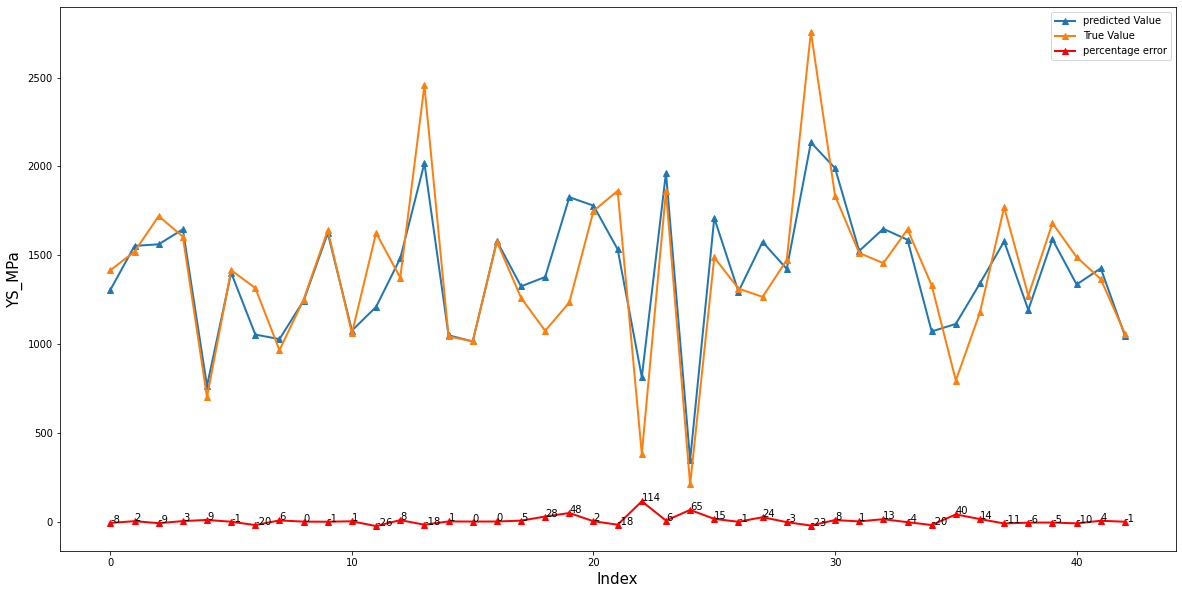

In [9]:
########################TEST1##########################
featuresTaken=['R_delta','S_config','R_cov_delta','VEC','E_delta','Compress_delta','H_avg','E_coh_delta','Senkov_param']
X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000,max_features=1)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
error=(predict-y_test)*100/y_test

n=y_test.shape[0]
print(i)

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)
#plt.hline(0,range(0,4n4))
# for i in range(0,44):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300)

In [10]:
featuresTaken=['R_delta','S_config','R_cov_delta','VEC','E_delta','Compress_delta','H_avg','E_coh_delta','Senkov_param']
X=df[featuresTaken]
X

R_delta  S_config  R_cov_delta        VEC   E_delta  Compress_delta  \
0    0.056584  0.014697     0.064873   7.090909  0.383452        0.493707   
1    0.056687  0.014585     0.061331   7.111111  0.377054        0.489985   
2    0.056775  0.014432     0.057185   7.132075  0.369134        0.486033   
3    0.062718  0.014697     0.084390   7.000000  0.347823        0.460904   
4    0.056847  0.014222     0.052247   7.153846  0.359325        0.481837   
..        ...       ...          ...        ...       ...             ...   
128  0.044498  0.011526     0.036196  10.000000  0.321057        0.454673   
129  0.003781  0.009134     0.025832   9.000000  0.030940        0.055990   
130  0.021105  0.010686     0.027944   8.615385  0.133791        0.215222   
131  0.038915  0.010686     0.026554   8.538462  0.190343        0.364146   
132  0.043196  0.011467     0.037086   9.866667  0.303865        0.468174   

          H_avg  E_coh_delta  Senkov_param  
0    665.090909     0.196517      2.277108  
1    672.222222     0.184600      2.201734  
2    679.622641     0.170030      2.120157  
3    654.181818     0.238396      1.592164  
4    687.307692     0.151741      2.032406  
..          ...          ...           ...  
128  338.952500     0.367762      3.010508  
129  763.666667     0.015294     15.536349  
130  885.692308     0.021518      2.802976  
131  717.769231     0.062618      3.082315  
132  339.082667     0.337010      3.569284  

[130 rows x 9 columns]

In [11]:
df2=df

In [12]:
df=df2
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
y=df['YS_MPa']
rfe=RFE(estimator=DecisionTreeRegressor(),n_features_to_select=1)
rfe.fit(X,y)
features,isSelected,ranking=list(),list(),list()
for i in range(len(X.columns.tolist())):
    features.append(X.columns.tolist()[i])
    isSelected.append(rfe.support_[i])
    ranking.append(rfe.ranking_[i])
    #print(f'ColumnName:{X.columns.tolist()[i]},Selected:{rfe.support_[i]},Ranking:{rfe.ranking_[i]}')
result_df=pd.DataFrame(data=[[features[i],isSelected[i],ranking[i]] for i in range(len(features))],columns=['Features','isSelected','ranking'])
result_df=result_df.sort_values(by='ranking',ascending=True)
result_df.set_index('Features')
result_df

Features  isSelected  ranking
2              VEC        True        1
13  Compress_delta       False        2
0          R_delta       False        3
20      H_ch_M_L_R       False        4
8            G_avg       False        5
7          E_delta       False        6
1         S_config       False        7
4      density_avg       False        8
3      R_cov_delta       False        9
16        Vm_delta       False       10
21      H_el_M_S_R       False       11
11         B_delta       False       12
15           H_avg       False       13
9          G_delta       False       14
12    Compress_avg       False       15
14    EN_Allen_avg       False       16
17       E_coh_avg       False       17
10           B_avg       False       18
6            E_avg       False       19
19    Senkov_param       False       20
5           Tm_avg       False       21
18     E_coh_delta       False       22

In [13]:
featuresTaken=['R_delta','S_config','R_cov_delta','VEC','E_delta','Compress_delta','H_avg','E_coh_delta','Senkov_param']
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
y=df['YS_MPa']
rfe=RFE(estimator=DecisionTreeRegressor(),n_features_to_select=1)
rfe.fit(X,y)
features,isSelected,ranking=list(),list(),list()
for i in range(len(X.columns.tolist())):
    features.append(X.columns.tolist()[i])
    isSelected.append(rfe.support_[i])
    ranking.append(rfe.ranking_[i])
    #print(f'ColumnName:{X.columns.tolist()[i]},Selected:{rfe.support_[i]},Ranking:{rfe.ranking_[i]}')
result_df=pd.DataFrame(data=[[features[i],isSelected[i],ranking[i]] for i in range(len(features))],columns=['Features','isSelected','ranking'])
result_df=result_df.sort_values(by='ranking',ascending=True)
result_df.set_index('Features')
result_df

Features  isSelected  ranking
2              VEC        True        1
13  Compress_delta       False        2
0          R_delta       False        3
20      H_ch_M_L_R       False        4
8            G_avg       False        5
4      density_avg       False        6
7          E_delta       False        7
1         S_config       False        8
3      R_cov_delta       False        9
11         B_delta       False       10
21      H_el_M_S_R       False       11
16        Vm_delta       False       12
15           H_avg       False       13
9          G_delta       False       14
12    Compress_avg       False       15
14    EN_Allen_avg       False       16
17       E_coh_avg       False       17
19    Senkov_param       False       18
6            E_avg       False       19
5           Tm_avg       False       20
18     E_coh_delta       False       21
10           B_avg       False       22

RMS error= 240.80572425795765
Absolute Error= 180.46901827242525
21


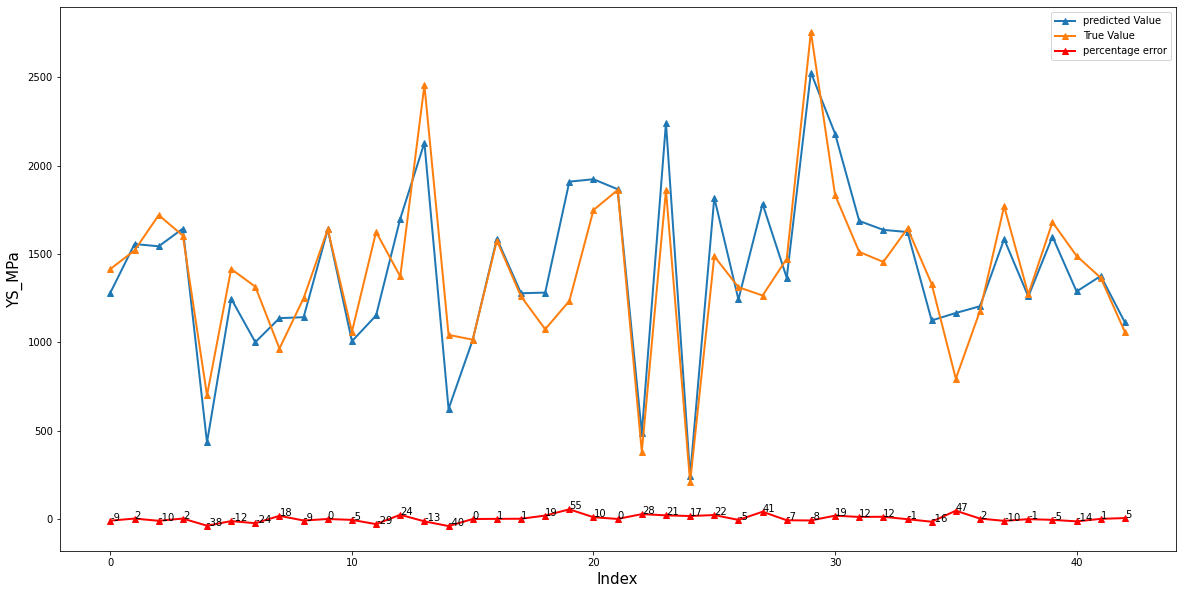

In [14]:
########################TEST2##########################
featuresTaken=['VEC', 'Compress_delta', 'R_delta', 'S_config']
X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000,max_features=4)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
error=(predict-y_test)*100/y_test

n=y_test.shape[0]
print(i)

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)
#plt.hline(0,range(0,4n4))
# for i in range(0,44):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300)

In [15]:
allc=df.drop(columns=['alloy_name','phases','YS_MPa']).columns.values
#print(allc)
for el in allc:
    feat=el
    print(df.corr().sort_values(by=[feat],ascending=False)[feat])

R_delta           1.000000
H_el_M_S_R        0.849535
Vm_delta          0.824877
R_cov_delta       0.579121
Compress_avg      0.507455
H_avg             0.506477
B_delta           0.422819
YS_MPa            0.420655
S_config          0.324568
G_delta           0.293791
E_delta           0.235443
Compress_delta    0.227421
E_coh_delta       0.006728
Senkov_param     -0.025144
EN_Allen_avg     -0.073144
E_coh_avg        -0.151625
VEC              -0.185109
Tm_avg           -0.221834
H_ch_M_L_R       -0.353847
G_avg            -0.484309
density_avg      -0.540921
E_avg            -0.544035
B_avg            -0.556956
Name: R_delta, dtype: float64
S_config          1.000000
YS_MPa            0.541700
R_cov_delta       0.474458
R_delta           0.324568
H_avg             0.236450
Vm_delta          0.215191
Compress_delta    0.195874
H_el_M_S_R        0.176088
G_delta           0.092796
E_delta           0.088323
EN_Allen_avg      0.038344
B_delta           0.037157
E_coh_delta       0.00656

RMS error= 161.8601546051643
Absolute Error= 130.10673076923075
42


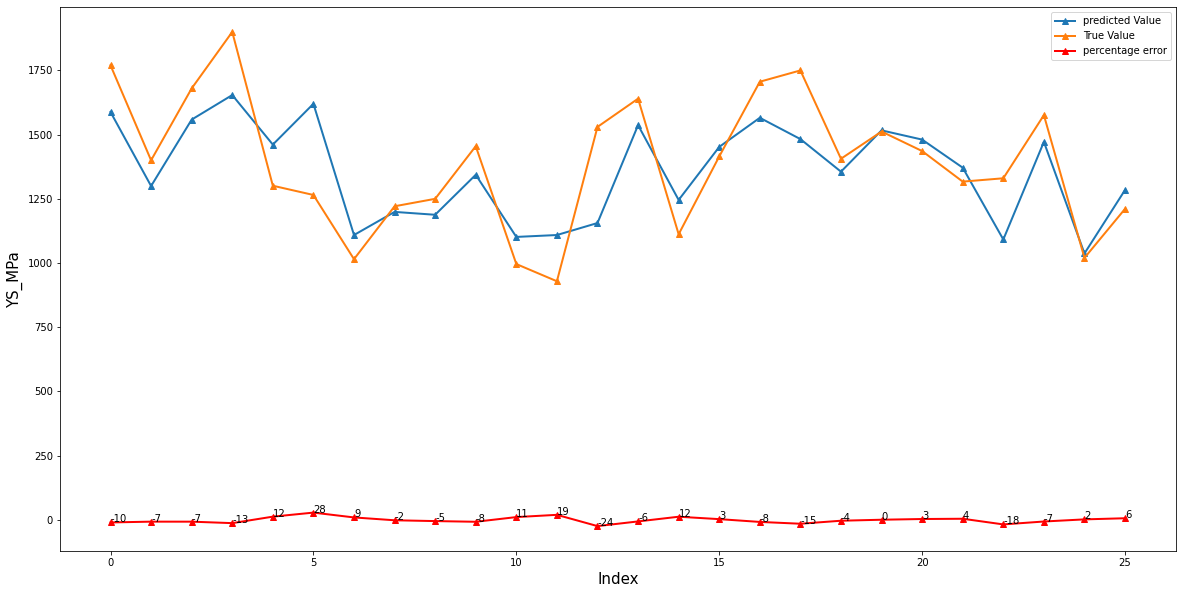

In [16]:
########################TEST3##########################
featuresTaken=['VEC', 'Compress_delta', 'R_delta', 'S_config']
df=df[df['phases']=='BCC']
X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000,max_features=4)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
error=(predict-y_test)*100/y_test

n=y_test.shape[0]
print(i)

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)
#plt.hline(0,range(0,4n4))
# for i in range(0,44):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300)

In [17]:
df[df['phases']=='BCC']

alloy_name phases  YS_MPa   R_delta  S_config  \
9        Al0.75CoCrCu0.25FeNiTi0.5    BCC    1900  0.062925  0.015547   
11                    AlCoCrFeNiTi    BCC    1860  0.071247  0.014897   
12                 AlCoCrFeNiSi0.6    BCC    1834  0.063447  0.014778   
13                 AlCoCrFeMo0.1Ni    BCC    1804  0.056901  0.013921   
15                       MoNbTiVZr    BCC    1770  0.067409  0.013381   
..                             ...    ...     ...       ...       ...   
110                   Al0.6MoTaTiV    BCC     962  0.038056  0.013242   
112                Mo0.1NbTiV0.3Zr    BCC     932  0.059647  0.011621   
113                     HfNbTaTiZr    BCC     929  0.049710  0.013381   
114                     NbTiV0.3Zr    BCC     866  0.058761  0.010836   
115  Hf0.4Nb1.54Ta1.54Ti0.89Zr0.63    BCC     822  0.043592  0.012435   

          VEC  R_cov_delta  density_avg       Tm_avg       E_avg  ...  \
9    7.272727     0.068861     7.145455  1726.890000  166.481818  ...   
11   6.666667     0.081989     6.665000  1727.220000  158.700000  ...   
12   6.857143     0.042650     6.585357  1684.378571  163.821429  ...   
13   7.176471     0.046205     7.156863  1707.807843  173.176471  ...   
15   4.800000     0.048937     7.160000  2379.600000  146.200000  ...   
..        ...          ...          ...          ...         ...  ...   
110  4.739130     0.067266     8.419565  2363.259130  170.895652  ...   
112  4.441176     0.046388     6.594118  2283.647059  101.500000  ...   
113  4.400000     0.037550     9.860000  2523.200000  119.400000  ...   
114  4.393939     0.045960     6.484848  2265.121212   94.575758  ...   
115  4.616000     0.031945    10.379060  2674.656000  126.776000  ...   

     Compress_avg  Compress_delta  EN_Allen_avg        H_avg  Vm_delta  \
9        0.704864        0.420404      1.732727   898.818182  0.184337   
11       0.752667        0.425371      1.693333  1044.666667  0.201495   
12       0.745036        0.445060      1.773571   880.000000  0.161826   
13       0.706196        0.477379      1.750392   695.294118  0.168557   
15       0.744400        0.395868      1.422000   944.600000  0.178793   
..            ...             ...           ...          ...       ...   
110      0.710000        0.465445      1.453478   858.739130  0.093631   
112      0.870588        0.305179      1.387059  1185.294118  0.157242   
113      0.831600        0.307792      1.322000  1152.600000  0.124061   
114      0.885879        0.287304      1.384545  1212.727273  0.155682   
115      0.728874        0.341635      1.351760   851.878000  0.108535   

     E_coh_avg  E_coh_delta  Senkov_param  H_ch_M_L_R  H_el_M_S_R  
9     4.190909     0.098592      1.858016      -14.45        5.19  
11    4.241667     0.104475      1.204018      -21.37        6.96  
12    4.174643     0.094608      1.515953      -16.42        4.08  
13    4.172941     0.127730      1.932860      -12.30        4.23  
15    6.160000     0.160220     12.685701       -2.51        5.87  
..         ...          ...           ...         ...         ...  
110   5.894348     0.261358      3.176985       -9.85        2.15  
112   6.160294     0.175468     32.363008        0.82        4.46  
113   6.642000     0.170238     12.692708        2.66        3.37  
114   6.140303     0.177675     17.285516        1.42        4.27  
115   6.992360     0.168699     13.631361        2.44        2.29  

[77 rows x 25 columns]

In [18]:
featuresTaken=['R_delta','S_config','R_cov_delta','VEC','E_delta','Compress_delta','H_avg','E_coh_delta','Senkov_param']
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
y=df['YS_MPa']
rfe=RFE(estimator=DecisionTreeRegressor(),n_features_to_select=5)
rfe.fit(X,y)
features,isSelected,ranking=list(),list(),list()
for i in range(len(X.columns.tolist())):
    features.append(X.columns.tolist()[i])
    isSelected.append(rfe.support_[i])
    ranking.append(rfe.ranking_[i])
    #print(f'ColumnName:{X.columns.tolist()[i]},Selected:{rfe.support_[i]},Ranking:{rfe.ranking_[i]}')
result_df=pd.DataFrame(data=[[features[i],isSelected[i],ranking[i]] for i in range(len(features))],columns=['Features','isSelected','ranking'])
result_df=result_df.sort_values(by='ranking',ascending=True)
result_df.set_index('Features')
result_df


Features  isSelected  ranking
1         S_config        True        1
2              VEC        True        1
17       E_coh_avg        True        1
16        Vm_delta        True        1
7          E_delta        True        1
4      density_avg       False        2
10           B_avg       False        3
19    Senkov_param       False        4
11         B_delta       False        5
0          R_delta       False        6
13  Compress_delta       False        7
15           H_avg       False        8
8            G_avg       False        9
9          G_delta       False       10
12    Compress_avg       False       11
5           Tm_avg       False       12
3      R_cov_delta       False       13
6            E_avg       False       14
20      H_ch_M_L_R       False       15
18     E_coh_delta       False       16
14    EN_Allen_avg       False       17
21      H_el_M_S_R       False       18

In [19]:
featuresTaken=['R_delta','S_config','R_cov_delta','VEC','E_delta','Compress_delta','H_avg','E_coh_delta','Senkov_param']
df=df[df['phases']=='BCC']
X=df[featuresTaken]
y=df['YS_MPa']
rfe=RFE(estimator=DecisionTreeRegressor(),n_features_to_select=1)
rfe.fit(X,y)
features,isSelected,ranking=list(),list(),list()
for i in range(len(X.columns.tolist())):
    features.append(X.columns.tolist()[i])
    isSelected.append(rfe.support_[i])
    ranking.append(rfe.ranking_[i])
    #print(f'ColumnName:{X.columns.tolist()[i]},Selected:{rfe.support_[i]},Ranking:{rfe.ranking_[i]}')
result_df=pd.DataFrame(data=[[features[i],isSelected[i],ranking[i]] for i in range(len(features))],columns=['Features','isSelected','ranking'])
result_df=result_df.sort_values(by='ranking',ascending=True)
result_df.set_index('Features')
result_df


Features  isSelected  ranking
0         R_delta        True        1
4         E_delta       False        2
1        S_config       False        3
5  Compress_delta       False        4
3             VEC       False        5
8    Senkov_param       False        6
6           H_avg       False        7
7     E_coh_delta       False        8
2     R_cov_delta       False        9

In [20]:
allc

array(['R_delta', 'S_config', 'VEC', 'R_cov_delta', 'density_avg',
       'Tm_avg', 'E_avg', 'E_delta', 'G_avg', 'G_delta', 'B_avg',
       'B_delta', 'Compress_avg', 'Compress_delta', 'EN_Allen_avg',
       'H_avg', 'Vm_delta', 'E_coh_avg', 'E_coh_delta', 'Senkov_param',
       'H_ch_M_L_R', 'H_el_M_S_R'], dtype=object)

RMS error= 235.74659722218757
Absolute Error= 179.90919872646737


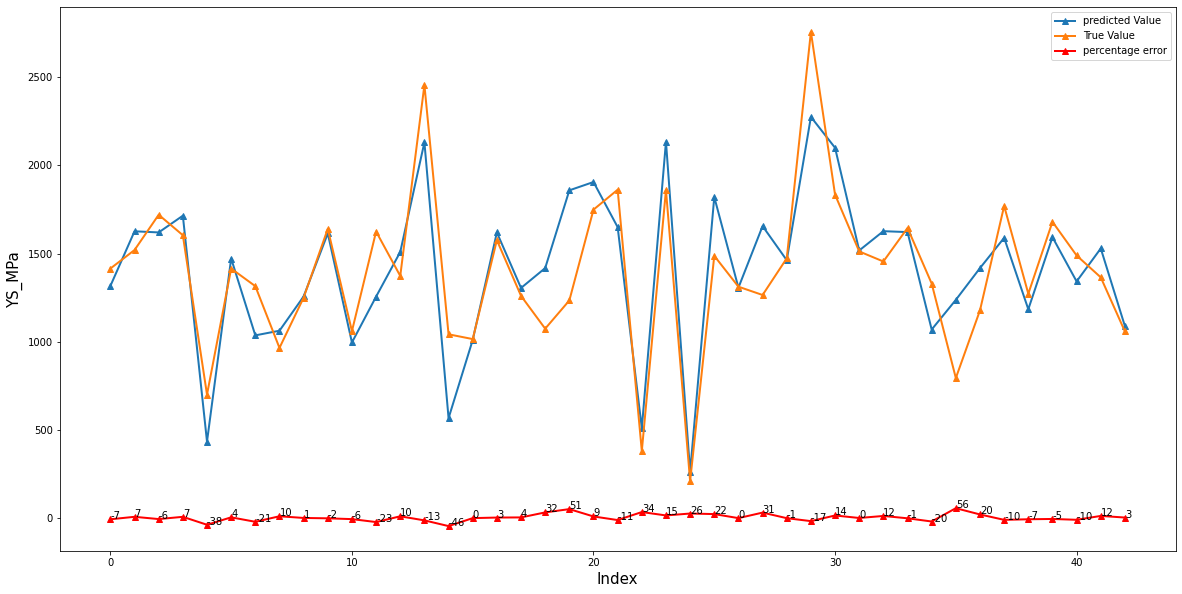

In [21]:
########################TEST1##########################
df=df2
featuresTaken=['R_delta','S_config','R_cov_delta','VEC','E_delta','Compress_delta','H_avg','E_coh_delta','Senkov_param','H_ch_M_L_R']
X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
error=(predict-y_test)*100/y_test

n=y_test.shape[0]
# print(i)

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)
#plt.hline(0,range(0,4n4))
# for i in range(0,44):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300)

RMS error= 235.79450932958164
Absolute Error= 180.21225957918054
42


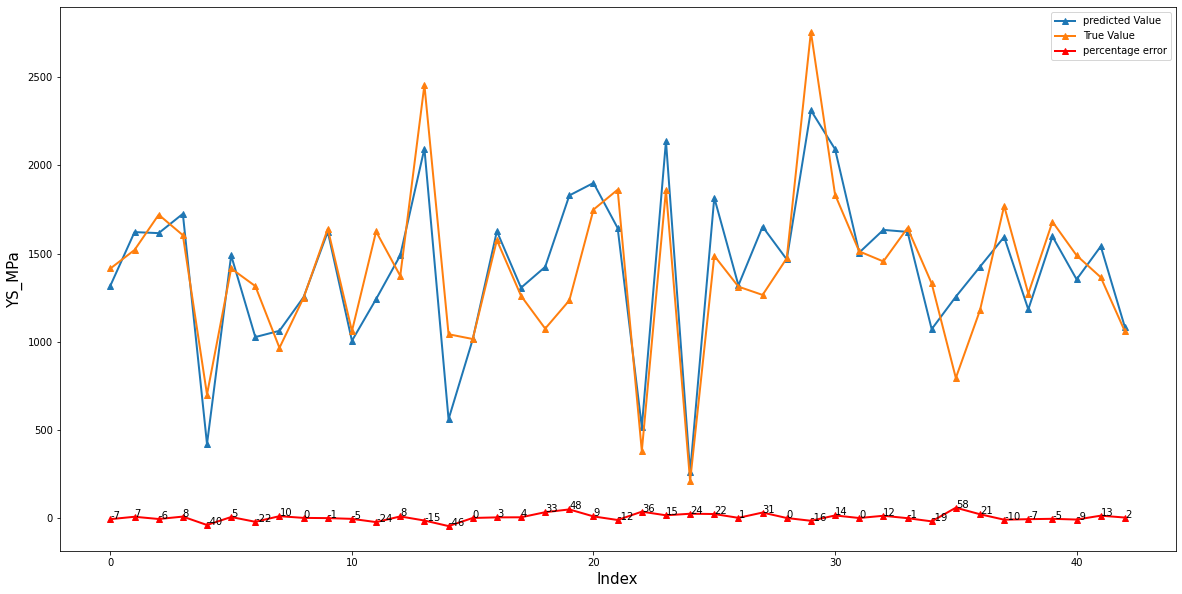

In [22]:
########################TEST1##########################
df=df2
featuresTaken=['R_delta','S_config','R_cov_delta','VEC','E_delta','Compress_delta','H_avg','E_coh_delta','Senkov_param','H_ch_M_L_R']
X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
error=(predict-y_test)*100/y_test

n=y_test.shape[0]
print(i)

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)
#plt.hline(0,range(0,4n4))
# for i in range(0,44):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300)

RMS error= 156.783737174565
Absolute Error= 125.02142307692309
42


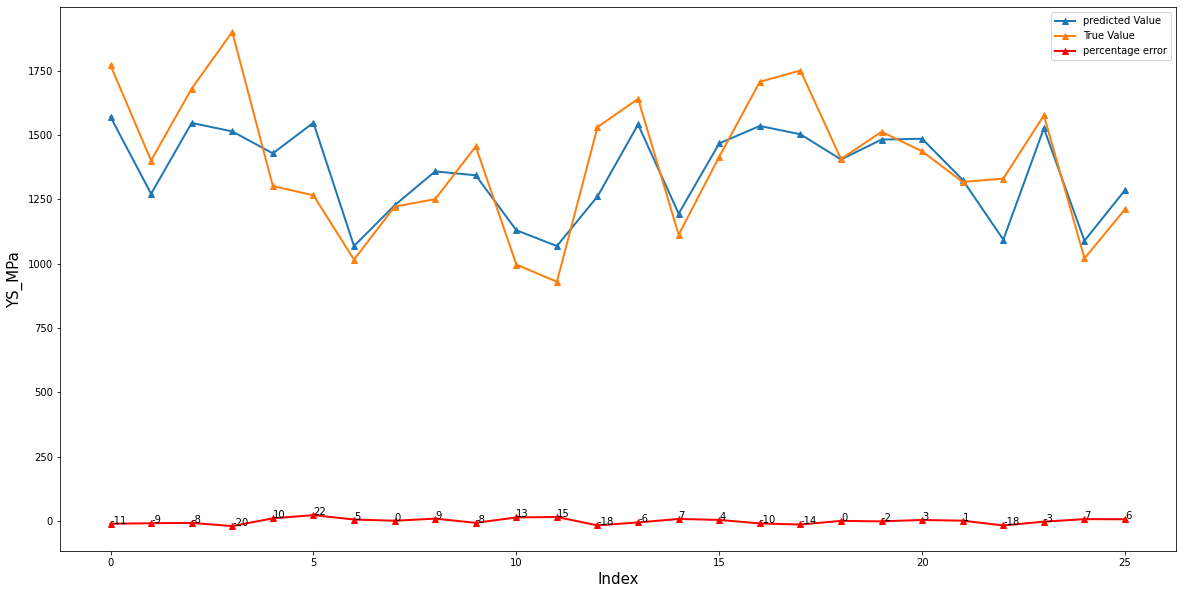

In [23]:
########################TEST1##########################
featuresTaken=['R_delta','S_config','R_cov_delta','VEC','E_delta','Compress_delta','H_avg','E_coh_delta','Senkov_param','H_ch_M_L_R']
df=df[df['phases']=='BCC']
X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
error=(predict-y_test)*100/y_test

n=y_test.shape[0]
print(i)

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)
#plt.hline(0,range(0,4n4))
# for i in range(0,44):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300)

In [24]:
RF

RandomForestRegressor(n_estimators=1000)

In [25]:
featuresTaken=['R_delta','S_config','R_cov_delta','VEC','E_delta','Compress_delta','H_avg','E_coh_delta','Senkov_param','H_ch_M_L_R']
df=df[df['phases']=='BCC']
X=df[featuresTaken]
y=df['YS_MPa']
rfe=RFE(estimator=DecisionTreeRegressor(),n_features_to_select=4)
rfe.fit(X,y)
features,isSelected,ranking=list(),list(),list()
for i in range(len(X.columns.tolist())):
    features.append(X.columns.tolist()[i])
    isSelected.append(rfe.support_[i])
    ranking.append(rfe.ranking_[i])
    #print(f'ColumnName:{X.columns.tolist()[i]},Selected:{rfe.support_[i]},Ranking:{rfe.ranking_[i]}')
result_df=pd.DataFrame(data=[[features[i],isSelected[i],ranking[i]] for i in range(len(features))],columns=['Features','isSelected','ranking'])
result_df=result_df.sort_values(by='ranking',ascending=True)
result_df.set_index('Features')
print(result_df['Features'].values)


['R_delta' 'S_config' 'VEC' 'E_delta' 'Senkov_param' 'Compress_delta'
 'H_avg' 'H_ch_M_L_R' 'R_cov_delta' 'E_coh_delta']


RMS error= 167.77816711337346
Absolute Error= 127.87146153846155
9


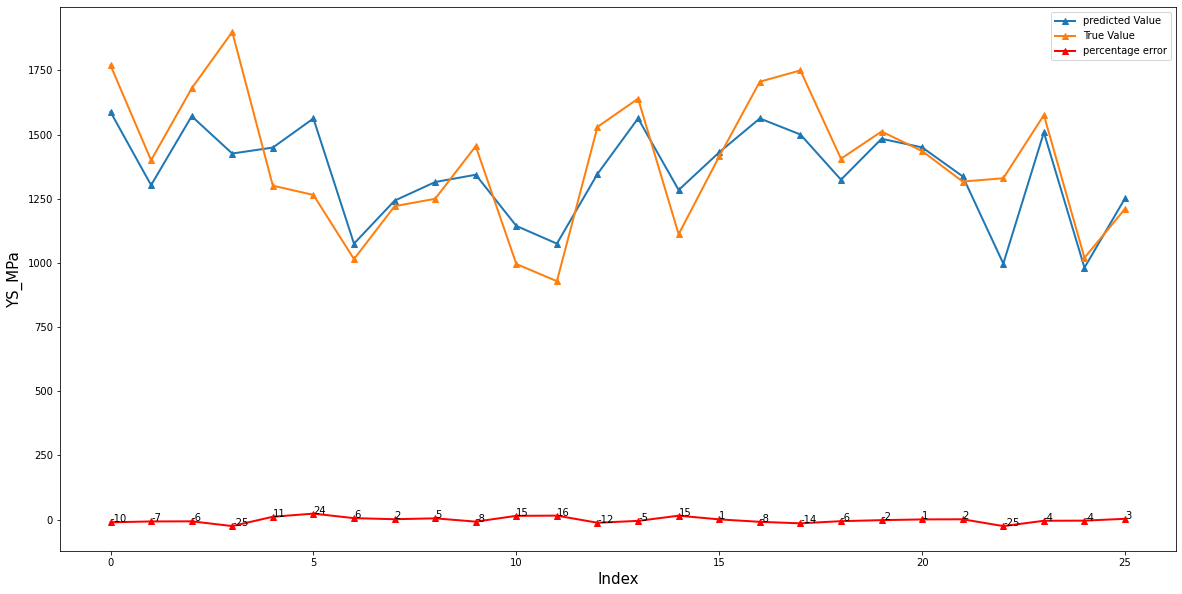

In [26]:
########################TEST1##########################
featuresTaken=['R_delta', 'S_config', 'VEC', 'E_delta']
df=df[df['phases']=='BCC']
X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

RF=RandomForestRegressor(n_estimators=1000,max_features=4)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
error=(predict-y_test)*100/y_test

n=y_test.shape[0]
print(i)

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)
#plt.hline(0,range(0,4n4))
# for i in range(0,44):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300)

RMS error= 157.50859112832788
Absolute Error= 126.43684615384616
25


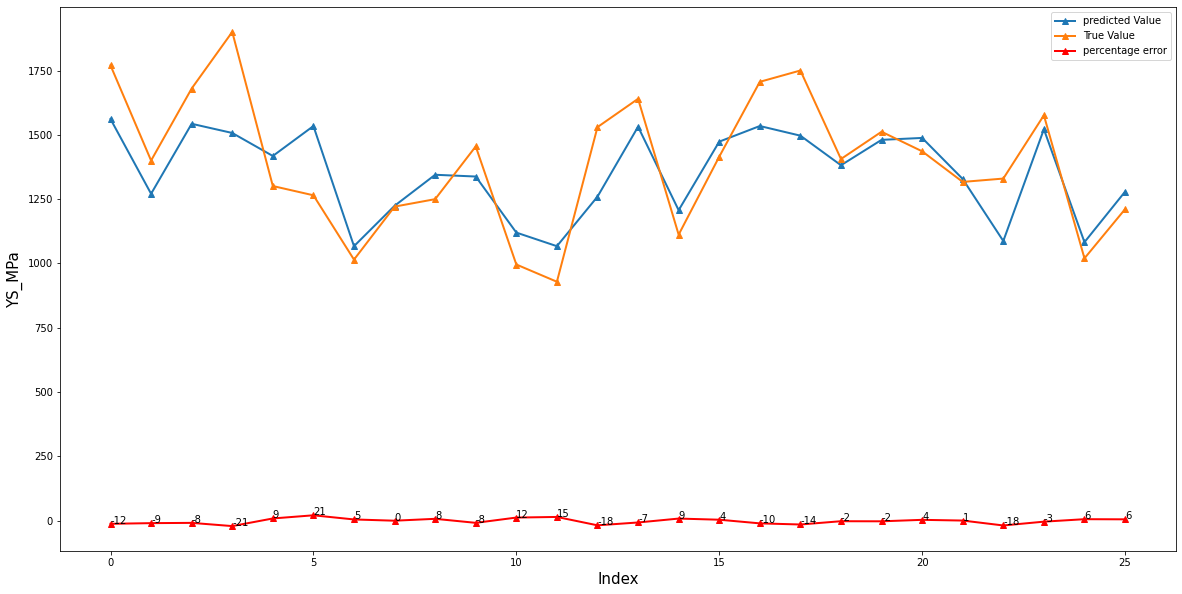

In [27]:
########################TEST1##########################
featuresTaken=['R_delta','S_config','R_cov_delta','VEC','E_delta','Compress_delta','H_avg','E_coh_delta','Senkov_param','H_ch_M_L_R']
df=df[df['phases']=='BCC']
X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
error=(predict-y_test)*100/y_test

n=y_test.shape[0]
print(i)

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)
#plt.hline(0,range(0,4n4))
# for i in range(0,44):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300)
from sklearn.inspection import permutation_importance
import shap
sorted_idx = RF.feature_importances_.argsort()
#plt.barh(boston.feature_names[sorted_idx], RF.feature_importances_[sorted_idx])
#plt.xlabel("Random Forest Feature Importance")

RMS error= 215.3812525971091
Absolute Error= 167.18271461794018
25


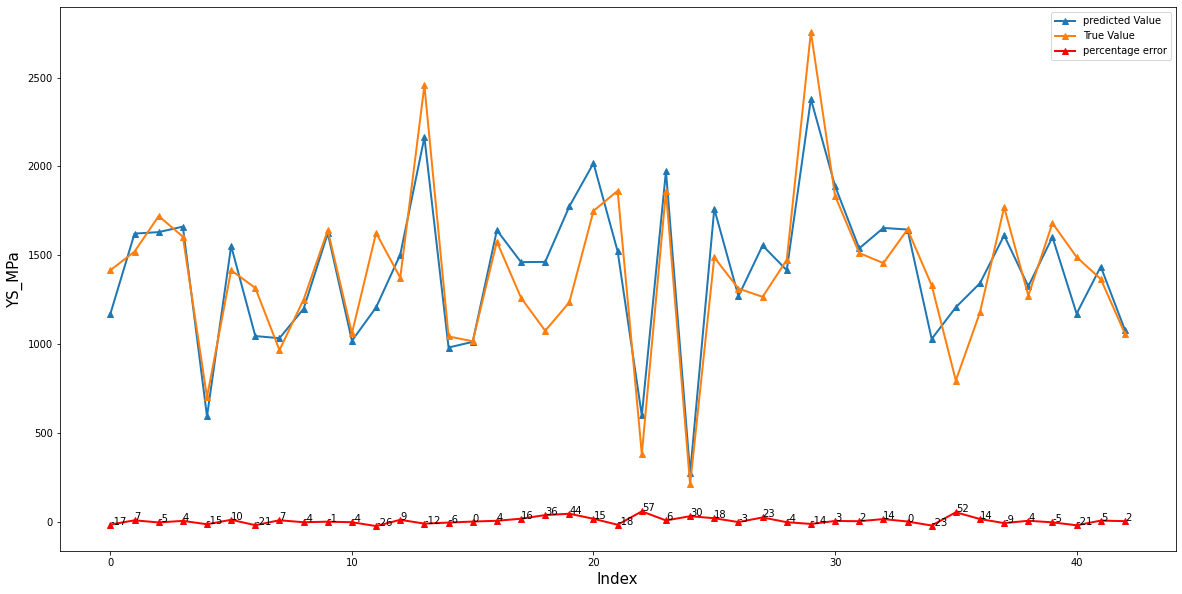

In [28]:
df=df2
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000,max_features=9)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')

error=(predict-y_test)*100/y_test

n=y_test.shape[0]
print(i)

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)
#plt.hline(0,range(0,4n4))
# for i in range(0,44):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300)


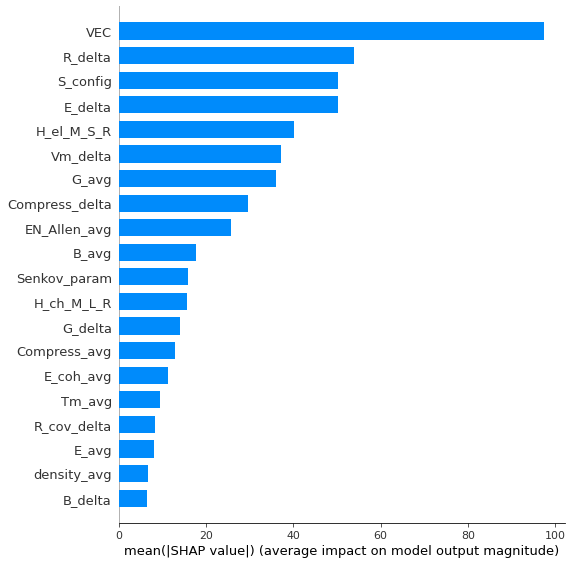

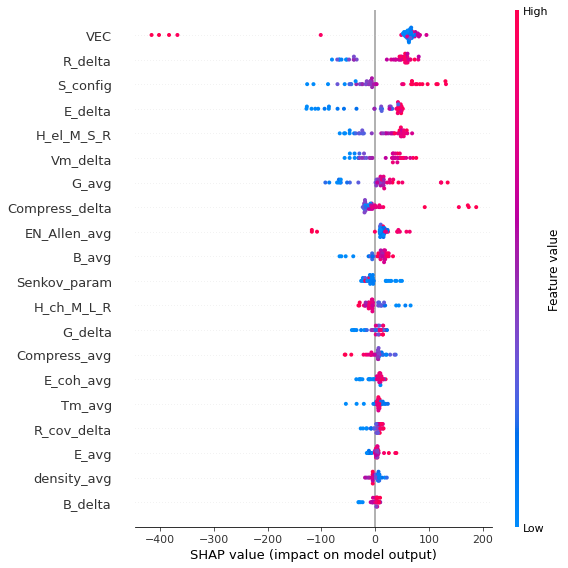

In [29]:
sorted_idx = RF.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

RMS error= 237.586397339672
Absolute Error= 184.44740243632336
42


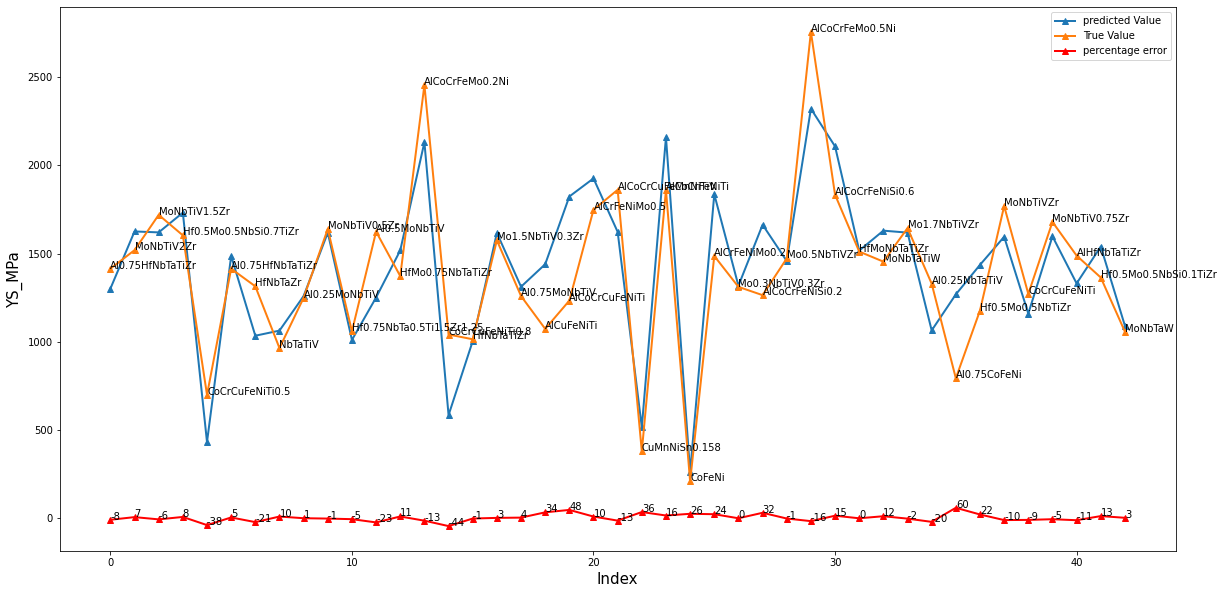

In [30]:
########################TEST1##########################
df=df2
featuresTaken=['R_delta','S_config','R_cov_delta','VEC','E_delta','Compress_delta','H_avg','E_coh_delta','Senkov_param','H_ch_M_L_R']
X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
error=(predict-y_test)*100/y_test

n=y_test.shape[0]
print(i)

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)
#plt.hline(0,range(0,4n4))
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300)

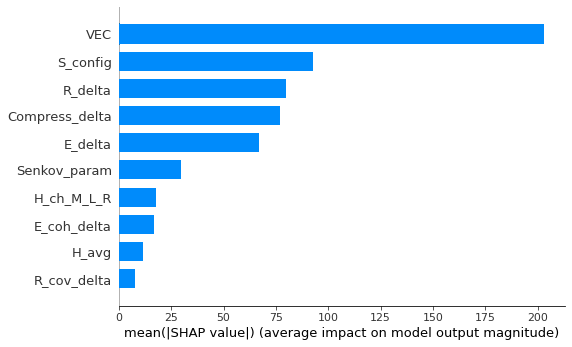

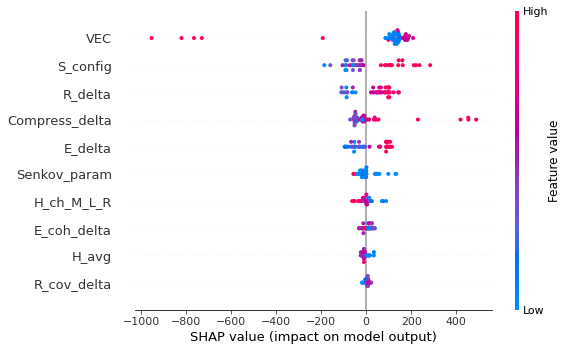

In [31]:
sorted_idx = RF.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

RMS error= 156.65458550201362
Absolute Error= 123.59934615384616
42


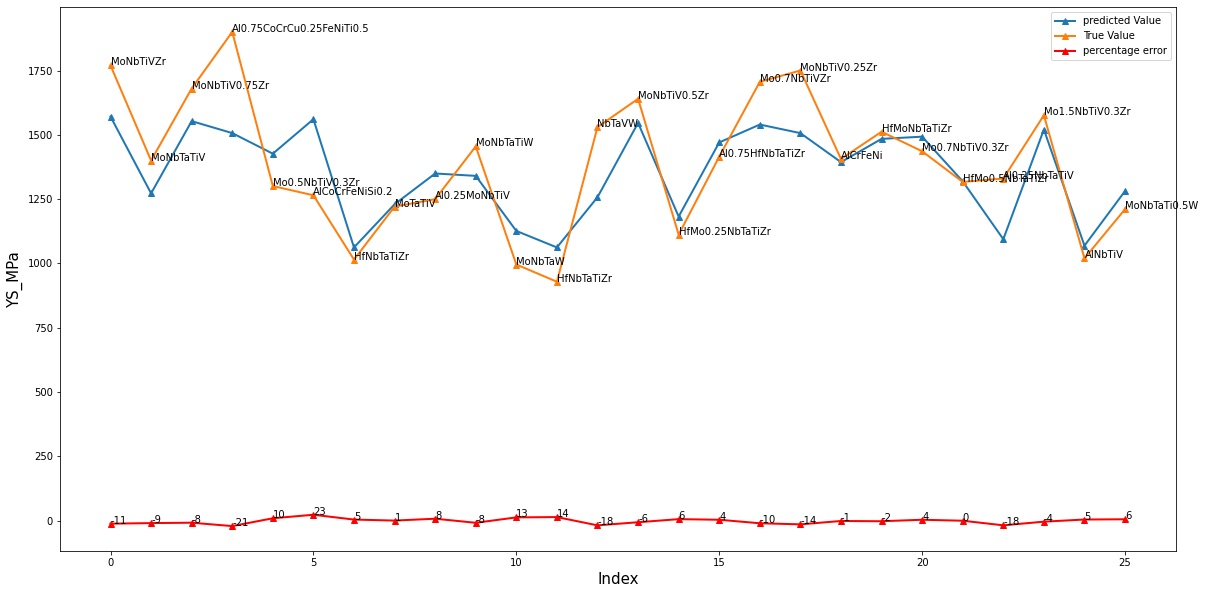

In [32]:
########################TEST1##########################
featuresTaken=['R_delta','S_config','R_cov_delta','VEC','E_delta','Compress_delta','H_avg','E_coh_delta','Senkov_param','H_ch_M_L_R']
df=df[df['phases']=='BCC']
X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
error=(predict-y_test)*100/y_test

n=y_test.shape[0]
print(i)

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)
#plt.hline(0,range(0,4n4))
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300)

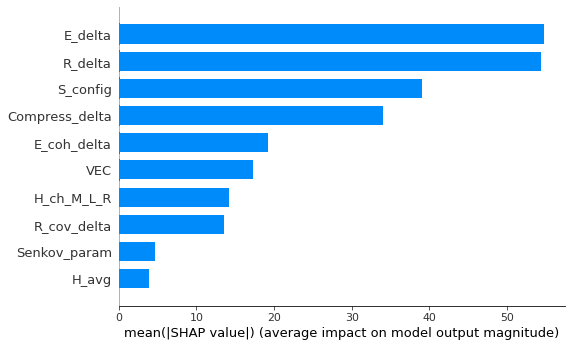

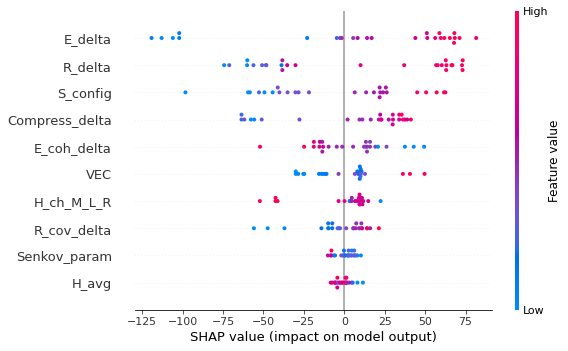

In [33]:
sorted_idx = RF.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

RMS error= 157.1930681707151
Absolute Error= 127.12038461538465
25


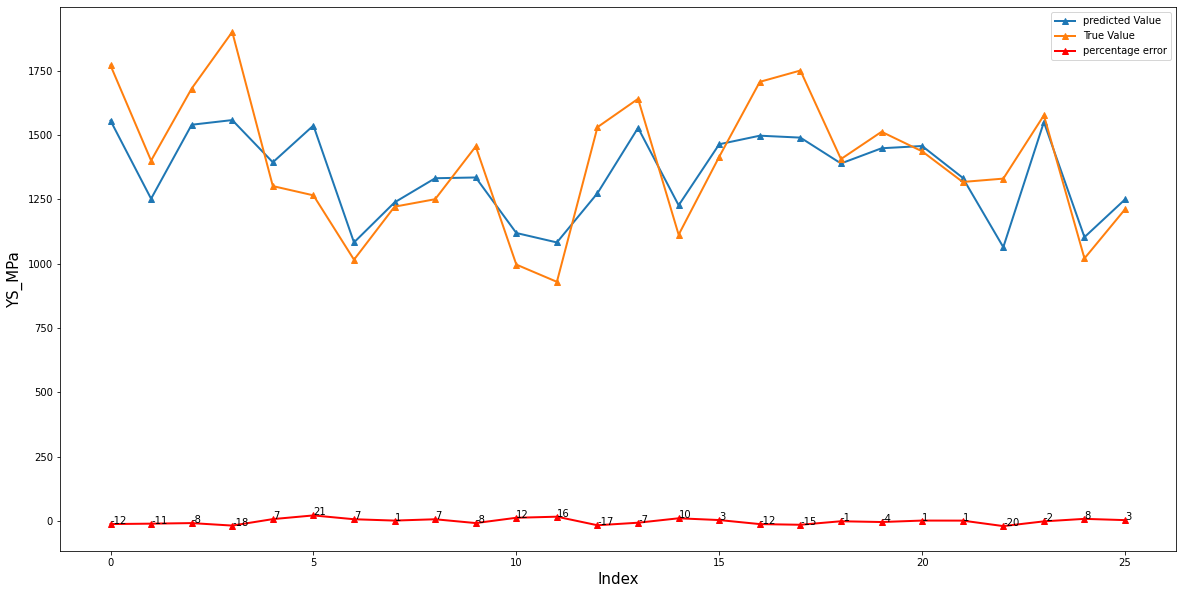

In [34]:
########################TEST1##########################
featuresTaken=['R_delta','S_config','R_cov_delta','VEC','E_delta','Compress_delta','H_avg','E_coh_delta','Senkov_param','H_ch_M_L_R']
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
error=(predict-y_test)*100/y_test

n=y_test.shape[0]
print(i)

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)
#plt.hline(0,range(0,4n4))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300)

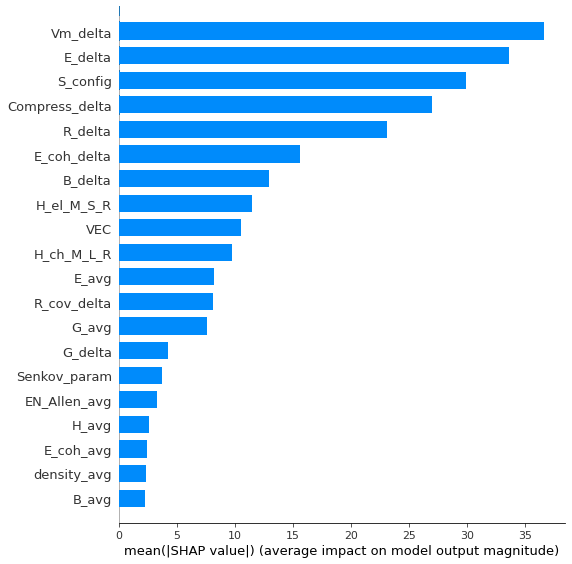

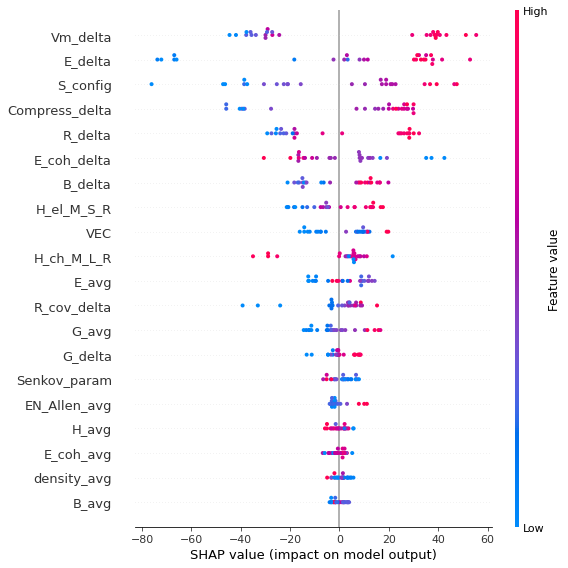

In [35]:
sorted_idx = RF.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

RMS error= 235.19386815346792
Absolute Error= 181.04163017718716
25


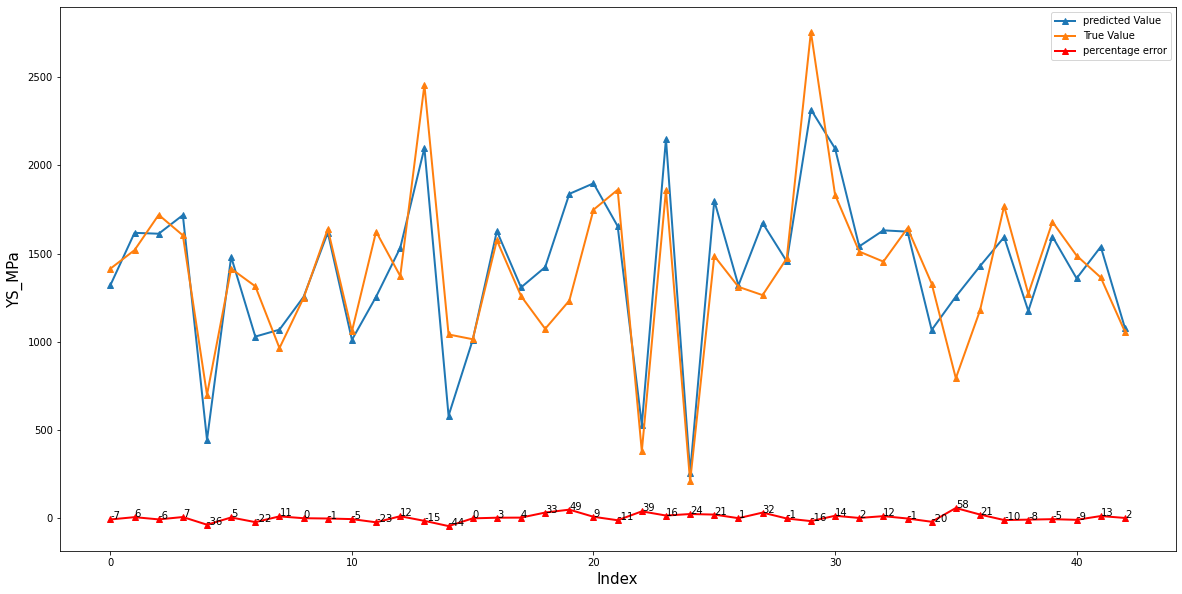

In [36]:
########################TEST1##########################
featuresTaken=['R_delta','S_config','R_cov_delta','VEC','E_delta','Compress_delta','H_avg','E_coh_delta','Senkov_param','H_ch_M_L_R']
df=df2
X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
error=(predict-y_test)*100/y_test

n=y_test.shape[0]
print(i)

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)
#plt.hline(0,range(0,4n4))
# for i in range(0,44):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300)


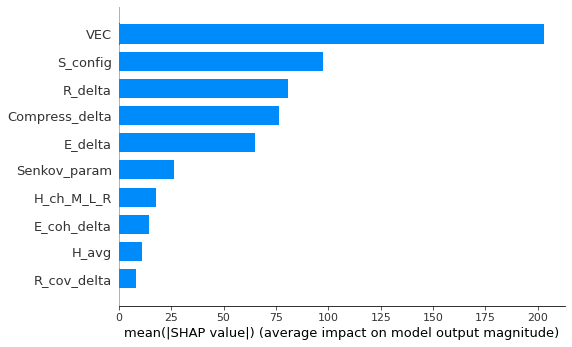

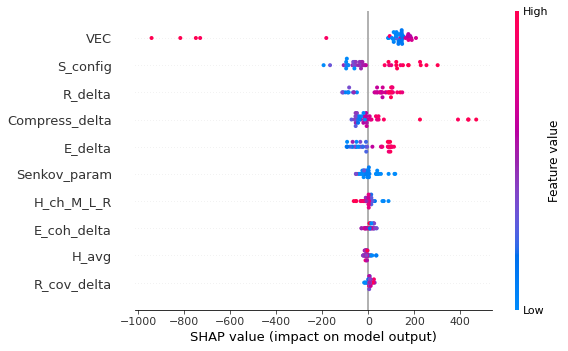

In [37]:
sorted_idx = RF.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

In [38]:
df.columns

Index(['alloy_name', 'phases', 'YS_MPa', 'R_delta', 'S_config', 'VEC',
       'R_cov_delta', 'density_avg', 'Tm_avg', 'E_avg', 'E_delta', 'G_avg',
       'G_delta', 'B_avg', 'B_delta', 'Compress_avg', 'Compress_delta',
       'EN_Allen_avg', 'H_avg', 'Vm_delta', 'E_coh_avg', 'E_coh_delta',
       'Senkov_param', 'H_ch_M_L_R', 'H_el_M_S_R'],
      dtype='object')

RMS error= 241.45749713385732
Absolute Error= 188.70389640088595


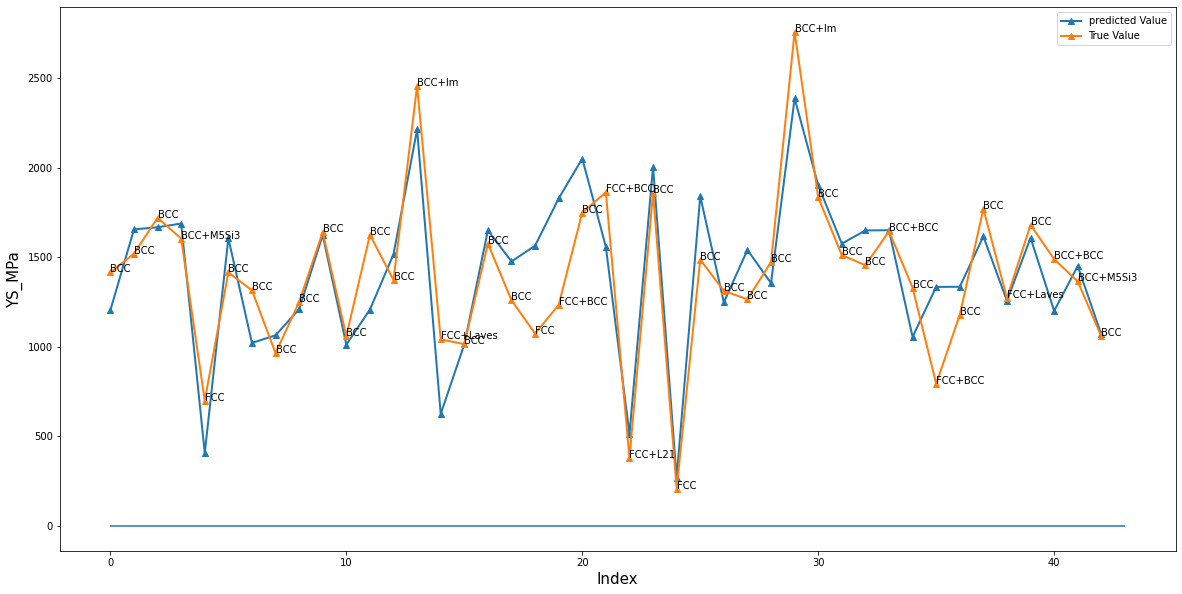

In [39]:
########################TEST1##########################
df=df[df['phases']=='BCC']
df=df2
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000,criterion='mse')

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
perror=(predict-y_test)*100/y_test #percentage Error


aerror=(predict-y_test); #absolute error

n=y_test.shape[0]

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
# plt.plot(range(0,n),perror,marker='^',color='red',label='percentage error',lw=2)
# plt.plot(range(0,n),aerror,marker='*',color='black',label='absolute error',lw=2)
plt.hlines(0,0,n)
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(round(perror.tolist()[i]),(i,perror.tolist()[i]),fontsize=20)
# for i in range(0,n):
#     plt.annotate(round(aerror.tolist()[i]),(i,aerror.tolist()[i]),fontsize=20,color='green')
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300) yhjg

RMS error= 235.7296774014313
Absolute Error= 181.9663473421927
42


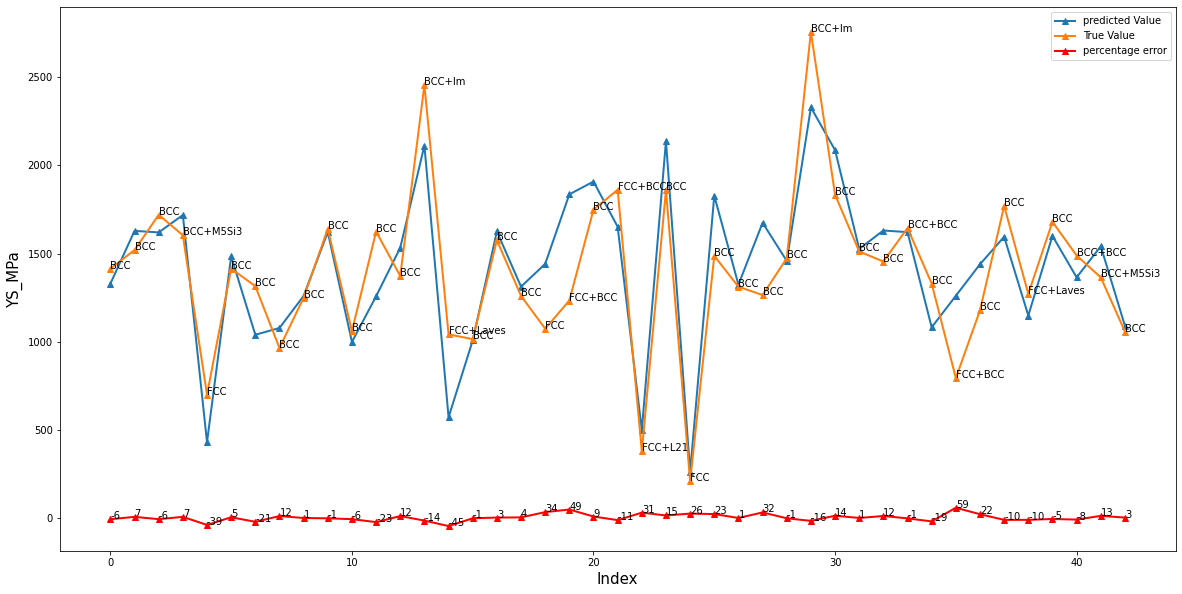

In [40]:
########################TEST1##########################
featuresTaken=['R_delta','S_config','R_cov_delta','VEC','E_delta','Compress_delta','H_avg','E_coh_delta','Senkov_param','H_ch_M_L_R']
df=df2
X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
error=(predict-y_test)*100/y_test

n=y_test.shape[0]
print(i)

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)
#plt.hline(0,range(0,4n4))
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
###plt.savefig('Test11Feb1.png',dpi=300)


RMS error= 127.37281439503717
Absolute Error= 90.19285887445889
42


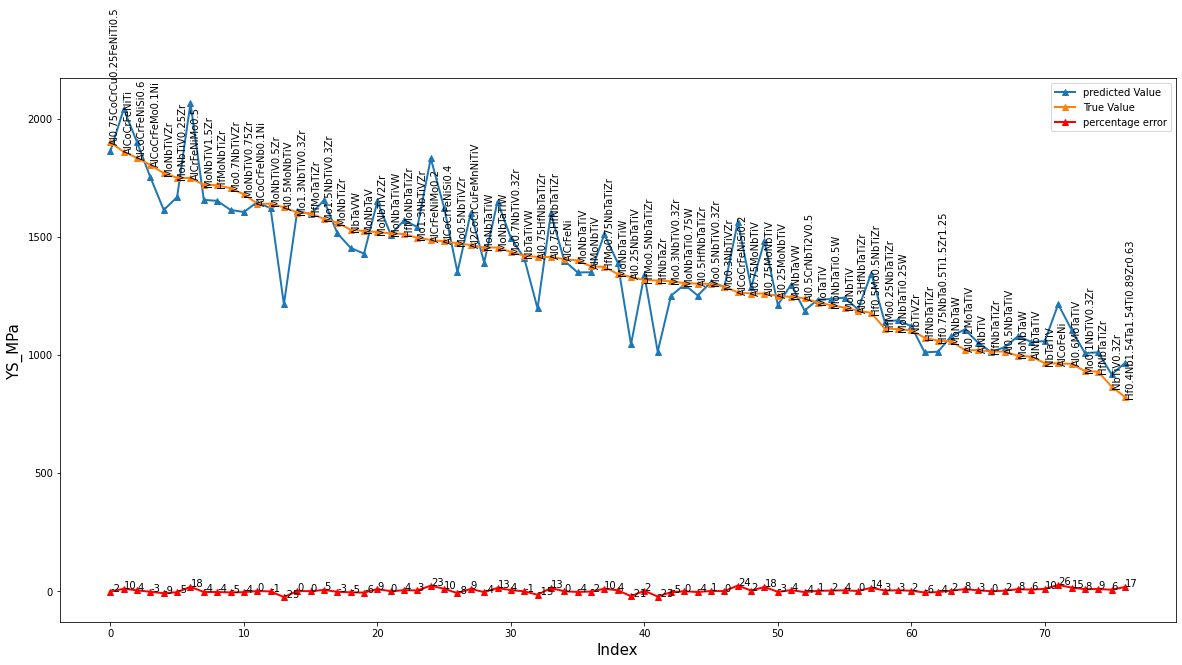

In [41]:
#Training on all phases (BCC,FCC) but testing only BCC part 
df=df2 #INIT to all alloys
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

#Model has been trained on all alloys

#Setting the X_test for only BCC
temp=df2

#temp=temp.merge(X_test,on=X_test.columns.to_list())
#print(temp)


temp=temp.drop_duplicates()
temp=temp[temp['phases']=='BCC']
#temp contains the X_test and Y_test required and only for BCC phases now

X_test=temp[X_test.columns.to_list()]

y_test=temp['YS_MPa']

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))

abserr=metrics.mean_absolute_error(predict,y_test)

print(f'RMS error= {rms}\nAbsolute Error= {abserr}')

error=(predict-y_test)*100/y_test

n=y_test.shape[0]
print(i)

plt.figure(figsize=(20,10))

plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)

plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)

plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)

#plt.hline(0,range(0,n))
for i in range(0,n):
    plt.annotate(temp[temp['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]),rotation=90)
    
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))

for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
    
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300)


RMS error= 156.21821583519244
Absolute Error= 126.45996153846151


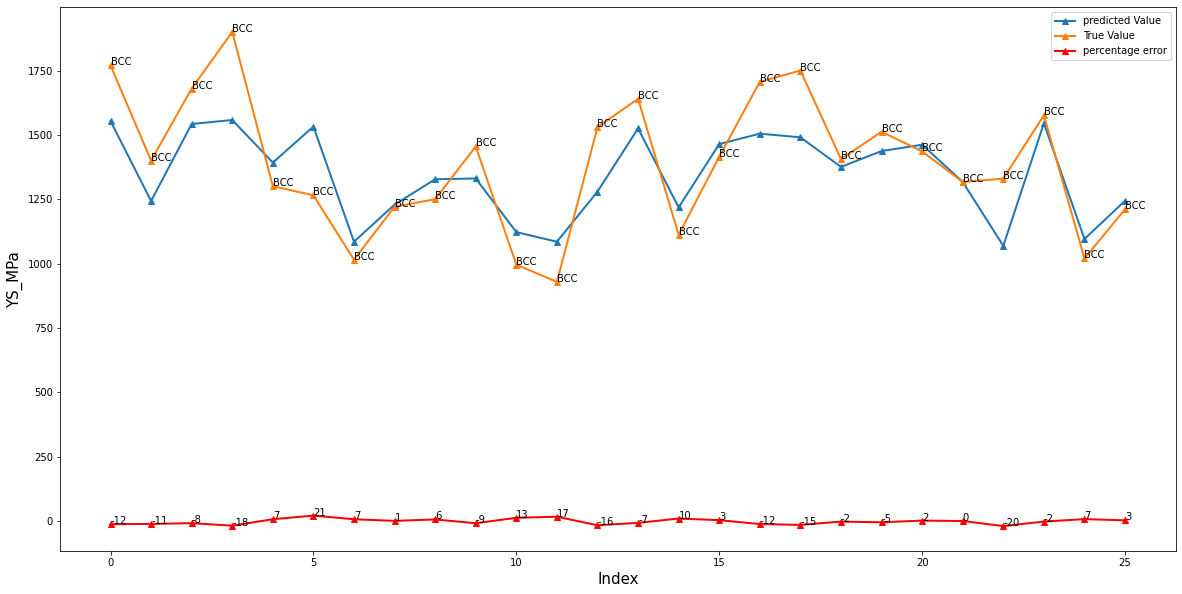

In [42]:
########################TEST1##########################
df=df[df['phases']=='BCC']
df=df2
df=df[df['phases']=='BCC']
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
perror=(predict-y_test)*100/y_test #percentage Error


aerror=(predict-y_test); #absolute error

n=y_test.shape[0]

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),perror,marker='^',color='red',label='percentage error',lw=2)
# plt.plot(range(0,n),aerror,marker='*',color='black',label='absolute error',lw=2)
# plt.hlines(0,0,n)
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(perror.tolist()[i]),(i,perror.tolist()[i]),fontsize=10)
# for i in range(0,n):
#     plt.annotate(round(aerror.tolist()[i]),(i,aerror.tolist()[i]),fontsize=20,color='green')
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300) yhjg


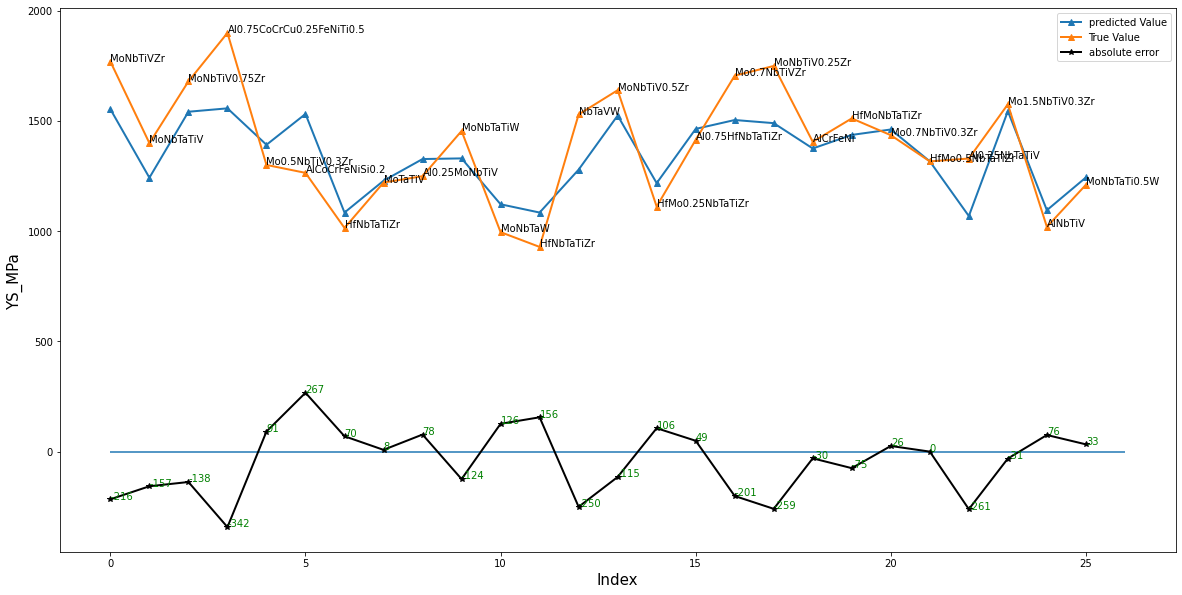

In [43]:
plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
# plt.plot(range(0,n),perror,marker='^',color='red',label='percentage error',lw=2)
plt.plot(range(0,n),aerror,marker='*',color='black',label='absolute error',lw=2)
plt.hlines(0,0,n)
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(round(perror.tolist()[i]),(i,perror.tolist()[i]),fontsize=20)
for i in range(0,n):
    plt.annotate(round(aerror.tolist()[i]),(i,aerror.tolist()[i]),fontsize=10,color='green')
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300) yhjg



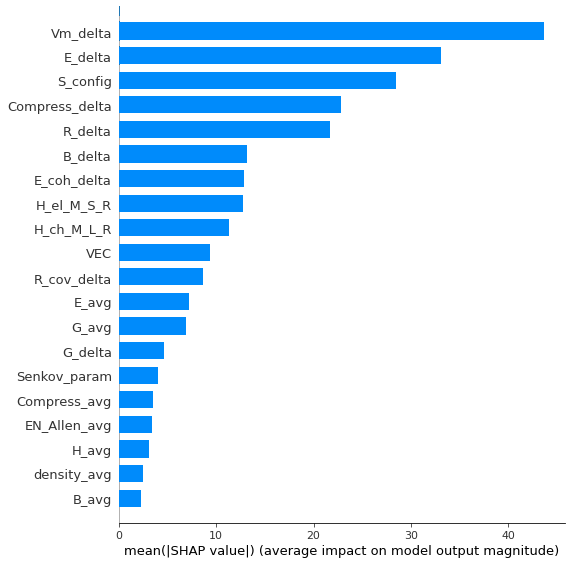

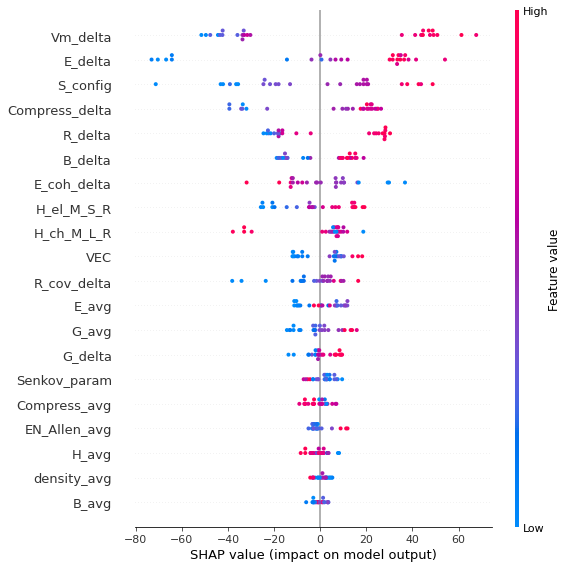

In [44]:
sorted_idx = RF.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


In [45]:
X.columns[sorted_idx]

Index(['Tm_avg', 'Compress_avg', 'H_avg', 'B_avg', 'E_coh_avg', 'density_avg',
       'EN_Allen_avg', 'G_delta', 'Senkov_param', 'VEC', 'E_avg', 'B_delta',
       'G_avg', 'R_cov_delta', 'H_ch_M_L_R', 'H_el_M_S_R', 'E_coh_delta',
       'R_delta', 'S_config', 'Compress_delta', 'E_delta', 'Vm_delta'],
      dtype='object')

['Compress_avg', 'Tm_avg', 'H_avg', 'E_coh_avg', 'B_avg', 'density_avg', 'G_delta', 'Senkov_param', 'EN_Allen_avg', 'E_avg', 'B_delta', 'G_avg', 'VEC', 'R_cov_delta', 'H_ch_M_L_R', 'H_el_M_S_R', 'R_delta', 'E_coh_delta', 'S_config', 'Vm_delta', 'Compress_delta', 'E_delta']
RMS error= 163.78999285435842
Absolute Error= 129.22215384615384


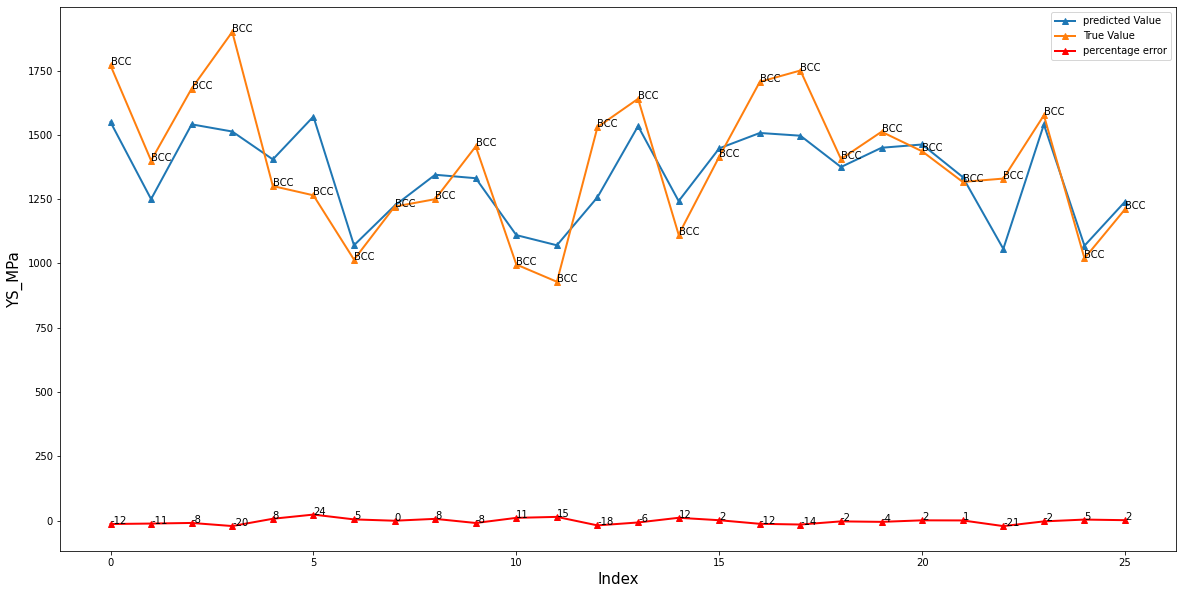

In [46]:
df=df[df['phases']=='BCC']
allFeats=[('Compress_avg',1), ('Tm_avg',1), ('H_avg',1), ('E_coh_avg',1), ('B_avg',1), ('density_avg',1),
       ('G_delta',1), ('Senkov_param',1), ('EN_Allen_avg',1), ('E_avg',1), ('B_delta',1), ('G_avg',1),
       ('VEC',1), ('R_cov_delta',1), ('H_ch_M_L_R',1), ('H_el_M_S_R',1), ('R_delta',1),
       ('E_coh_delta',1), ('S_config',1), ('Vm_delta',1), ('Compress_delta',1), ('E_delta',1)]
taken=[i[0] for i in allFeats if i[1]]
print(taken)
featuresTaken=[ 'EN_Allen_avg', 'E_avg', 'B_delta', 'G_avg',
       'VEC', 'R_cov_delta', 'H_ch_M_L_R', 'H_el_M_S_R', 'R_delta',
       'E_coh_delta', 'S_config', 'Vm_delta', 'Compress_delta', 'E_delta']

df=df2
df=df[df['phases']=='BCC']
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
perror=(predict-y_test)*100/y_test #percentage Error


aerror=(predict-y_test); #absolute error

n=y_test.shape[0]

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),perror,marker='^',color='red',label='percentage error',lw=2)
# plt.plot(range(0,n),aerror,marker='*',color='black',label='absolute error',lw=2)
# plt.hlines(0,0,n)
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(perror.tolist()[i]),(i,perror.tolist()[i]),fontsize=10)
# for i in range(0,n):
#     plt.annotate(round(aerror.tolist()[i]),(i,aerror.tolist()[i]),fontsize=20,color='green')
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300) yhjg


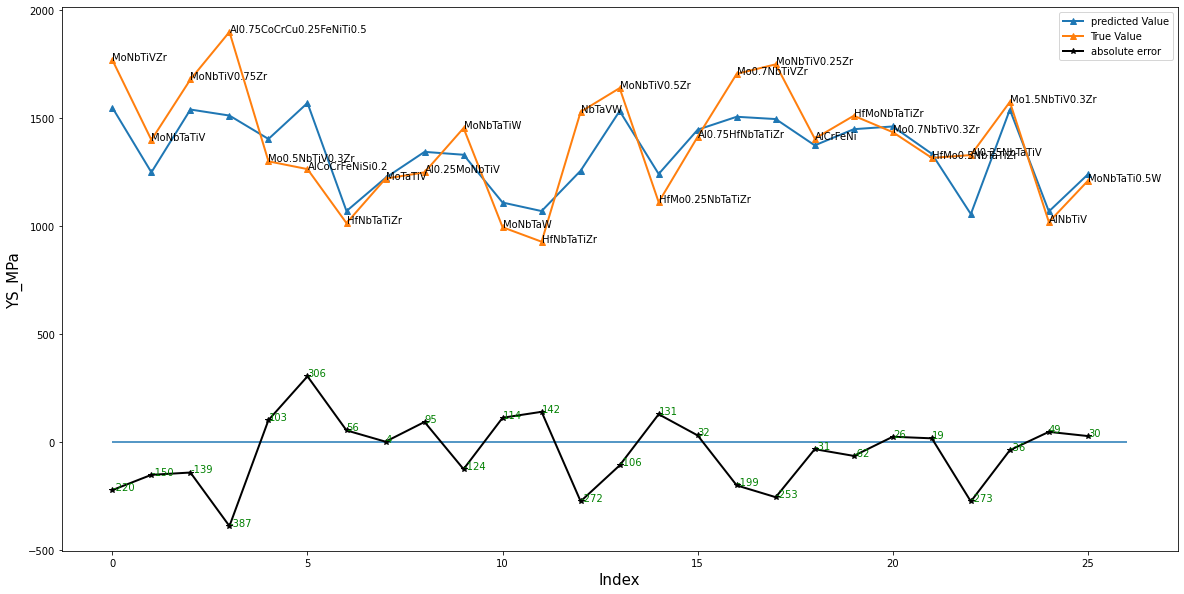

In [47]:
plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
# plt.plot(range(0,n),perror,marker='^',color='red',label='percentage error',lw=2)
plt.plot(range(0,n),aerror,marker='*',color='black',label='absolute error',lw=2)
plt.hlines(0,0,n)
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(round(perror.tolist()[i]),(i,perror.tolist()[i]),fontsize=20)
for i in range(0,n):
    plt.annotate(round(aerror.tolist()[i]),(i,aerror.tolist()[i]),fontsize=10,color='green')
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300) yhjg

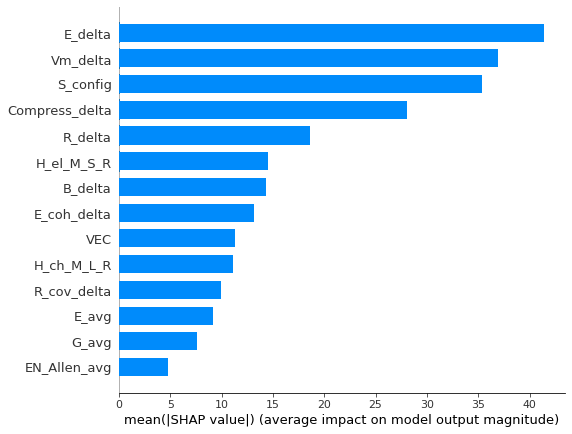

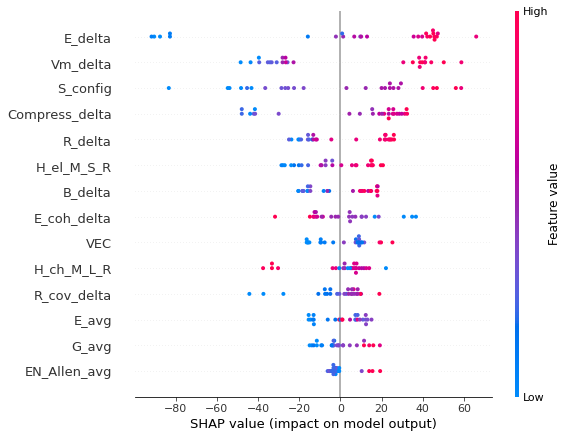

In [48]:
sorted_idx = RF.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


RMS error= 158.60398357411114
Absolute Error= 139.3298076923077
Percentage Error=10.244533413886915


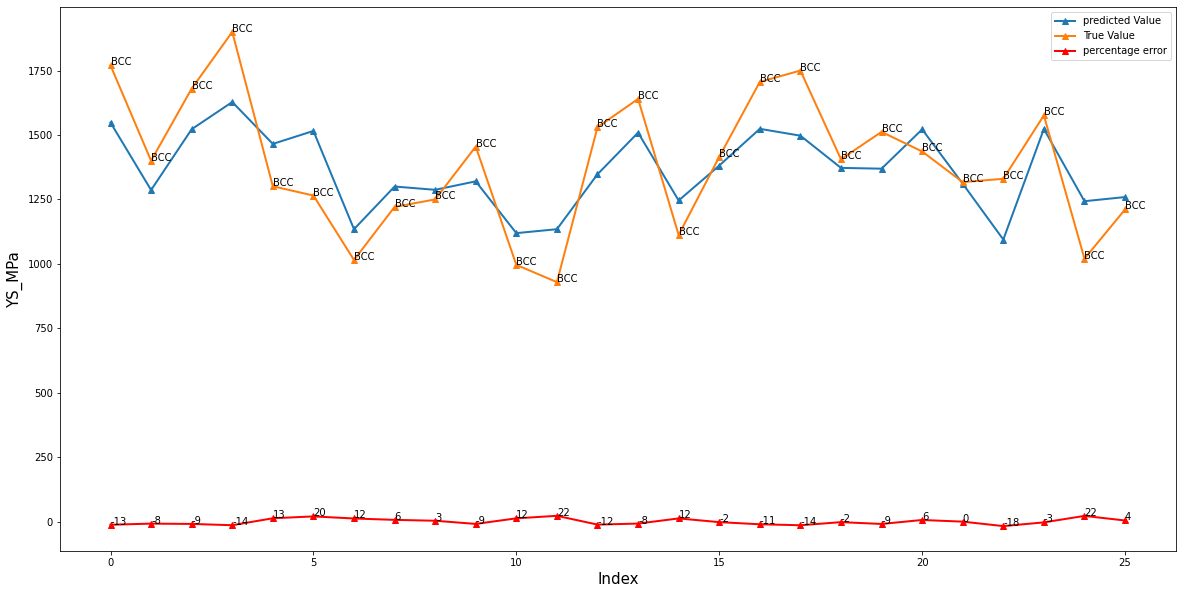

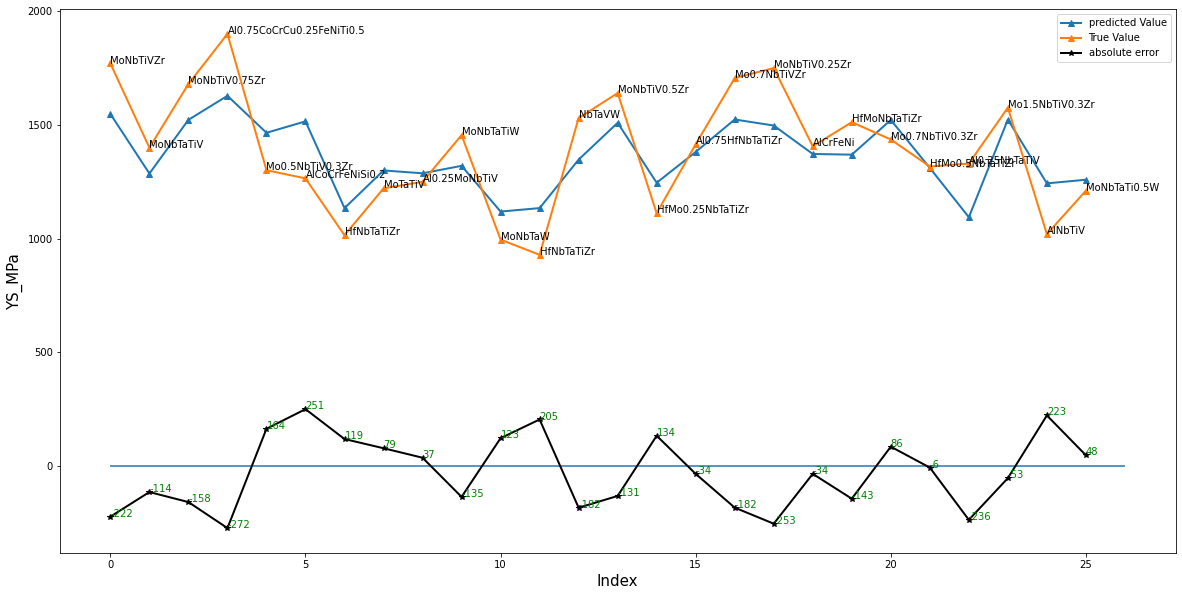

In [49]:
df=df[df['phases']=='BCC']
featuresTaken=['Compress_avg', 'Tm_avg', 'H_avg', 'E_coh_avg', 'B_avg', 'density_avg',
       'G_delta', 'Senkov_param' ]

df=df2
df=df[df['phases']=='BCC']
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
percentage_error=np.mean(np.abs((y_test - predict) / y_test)) * 100
print(f'RMS error= {rms}\nAbsolute Error= {abserr}\nPercentage Error={percentage_error}')
perror=(predict-y_test)*100/y_test #percentage Error


aerror=(predict-y_test); #absolute error

n=y_test.shape[0]

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),perror,marker='^',color='red',label='percentage error',lw=2)
# plt.plot(range(0,n),aerror,marker='*',color='black',label='absolute error',lw=2)
# plt.hlines(0,0,n)
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(perror.tolist()[i]),(i,perror.tolist()[i]),fontsize=10)
# for i in range(0,n):
#     plt.annotate(round(aerror.tolist()[i]),(i,aerror.tolist()[i]),fontsize=20,color='green')
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300) yhjg


plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
# plt.plot(range(0,n),perror,marker='^',color='red',label='percentage error',lw=2)
plt.plot(range(0,n),aerror,marker='*',color='black',label='absolute error',lw=2)
plt.hlines(0,0,n)
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(round(perror.tolist()[i]),(i,perror.tolist()[i]),fontsize=20)
for i in range(0,n):
    plt.annotate(round(aerror.tolist()[i]),(i,aerror.tolist()[i]),fontsize=10,color='green')
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300) yhjg



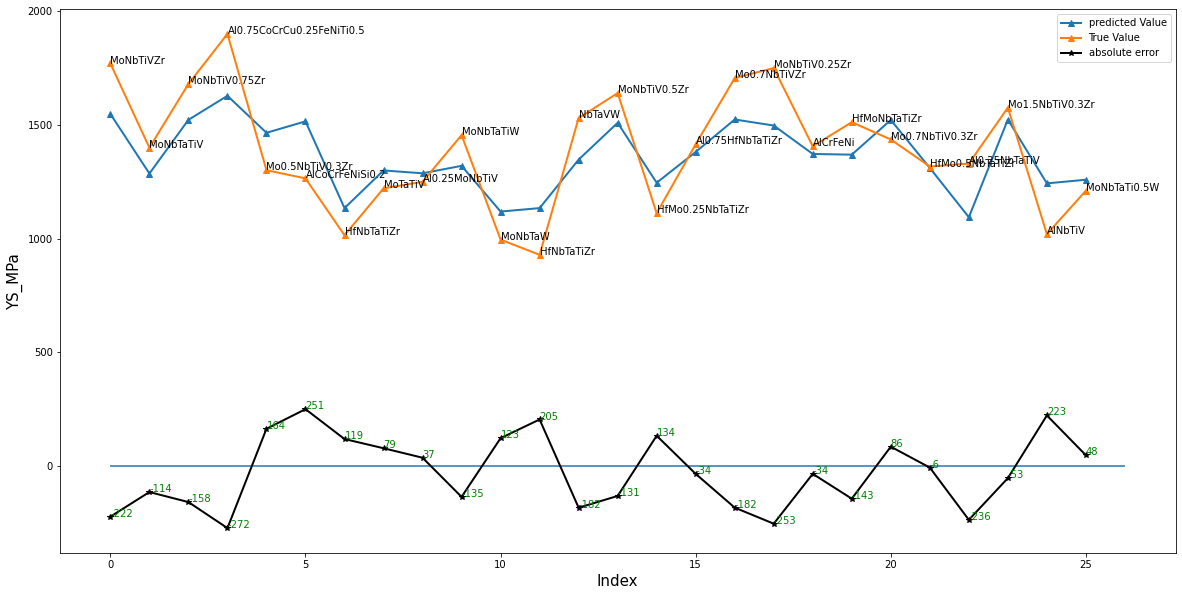

In [50]:
plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
# plt.plot(range(0,n),perror,marker='^',color='red',label='percentage error',lw=2)
plt.plot(range(0,n),aerror,marker='*',color='black',label='absolute error',lw=2)
plt.hlines(0,0,n)
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(round(perror.tolist()[i]),(i,perror.tolist()[i]),fontsize=20)
for i in range(0,n):
    plt.annotate(round(aerror.tolist()[i]),(i,aerror.tolist()[i]),fontsize=10,color='green')
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300) yhjg


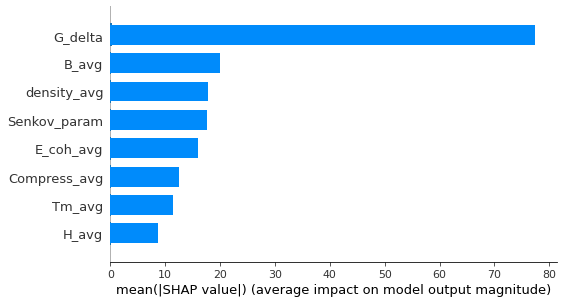

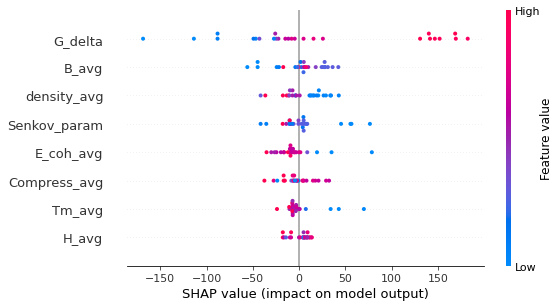

In [51]:
sorted_idx = RF.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


                  alloy_name     phases  YS_MPa   R_delta  S_config       VEC  \
0            AlCoCrFeMo0.5Ni     BCC+Im    2757  0.056584  0.014697  7.090909   
1            AlCoCrFeMo0.2Ni     BCC+Im    2456  0.056847  0.014222  7.153846   
2          AlCoCrCuFeMnNiTiV    FCC+BCC    1862  0.059485  0.018268  7.000000   
3               AlCoCrFeNiTi        BCC    1860  0.071247  0.014897  6.666667   
4            AlCoCrFeNiSi0.6        BCC    1834  0.063447  0.014778  6.857143   
5                  MoNbTiVZr        BCC    1770  0.067409  0.013381  4.800000   
6              AlCrFeNiMo0.5        BCC    1749  0.059914  0.013145  6.666667   
7               MoNbTiV1.5Zr        BCC    1720  0.068711  0.013254  4.818182   
8              MoNbTiV0.75Zr        BCC    1680  0.066303  0.013332  4.789474   
9               Mo1.7NbTiVZr    BCC+BCC    1645  0.065784  0.013154  4.947368   
10              MoNbTiV0.5Zr        BCC    1640  0.064763  0.013145  4.777778   
11              Al0.5MoNbTiV

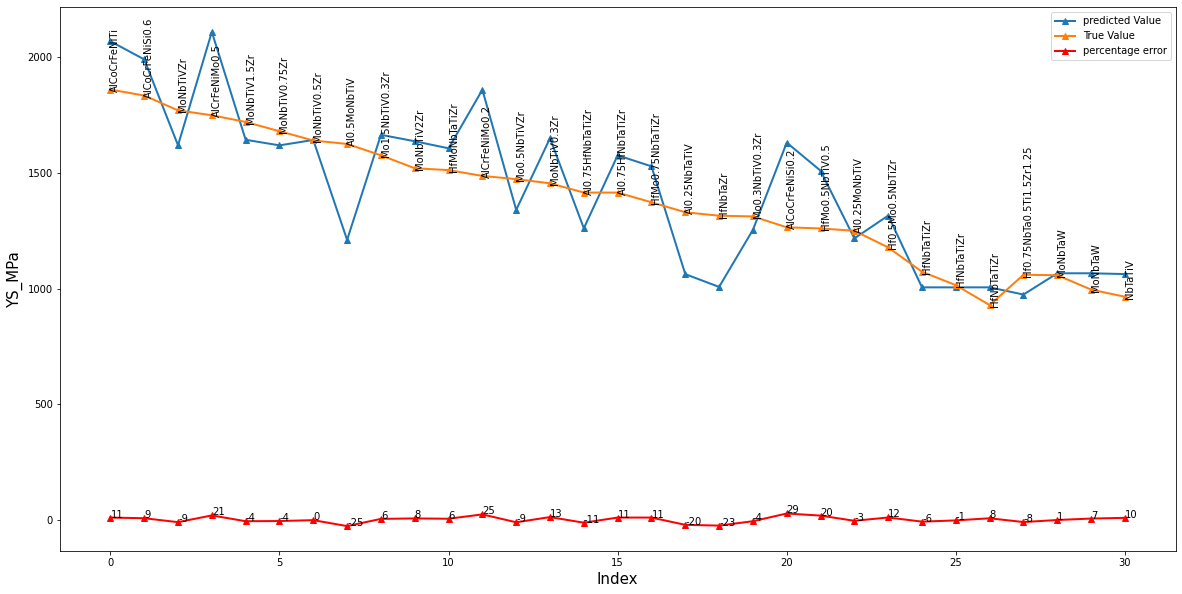

In [52]:
df=df[df['phases']=='BCC']
featuresTaken=[ 'H_ch_M_L_R', 'E_delta', 'H_el_M_S_R', 'Vm_delta',
       'Senkov_param', 'R_delta', 'S_config', 'Compress_delta', 'G_avg',
       'VEC']


df=df2
# X=df.drop(columns=['alloy_name','phases','YS_MPa'])
X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

#Model has been trained on all alloys

#Setting the X_test for only BCC
temp=df2

temp=temp.merge(X_test,on=X_test.columns.to_list())
print(temp)


temp=temp.drop_duplicates()
temp=temp[temp['phases']=='BCC']
#temp contains the X_test and Y_test required and only for BCC phases now

X_test=temp[X_test.columns.to_list()]

y_test=temp['YS_MPa']

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))

abserr=metrics.mean_absolute_error(predict,y_test)

print(f'RMS error= {rms}\nAbsolute Error= {abserr}')

error=(predict-y_test)*100/y_test

aerror=(predict-y_test); #absolute error

n=y_test.shape[0]
print(i)

plt.figure(figsize=(20,10))

plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)

plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)

plt.plot(range(0,n),error,marker='^',color='red',label='percentage error',lw=2)

#plt.hline(0,range(0,n))
for i in range(0,n):
    plt.annotate(temp[temp['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]),rotation=90)
    
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,error.tolist()[i]))

for i in range(0,n):
    plt.annotate(round(error.tolist()[i]),(i,error.tolist()[i]))
    
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300)


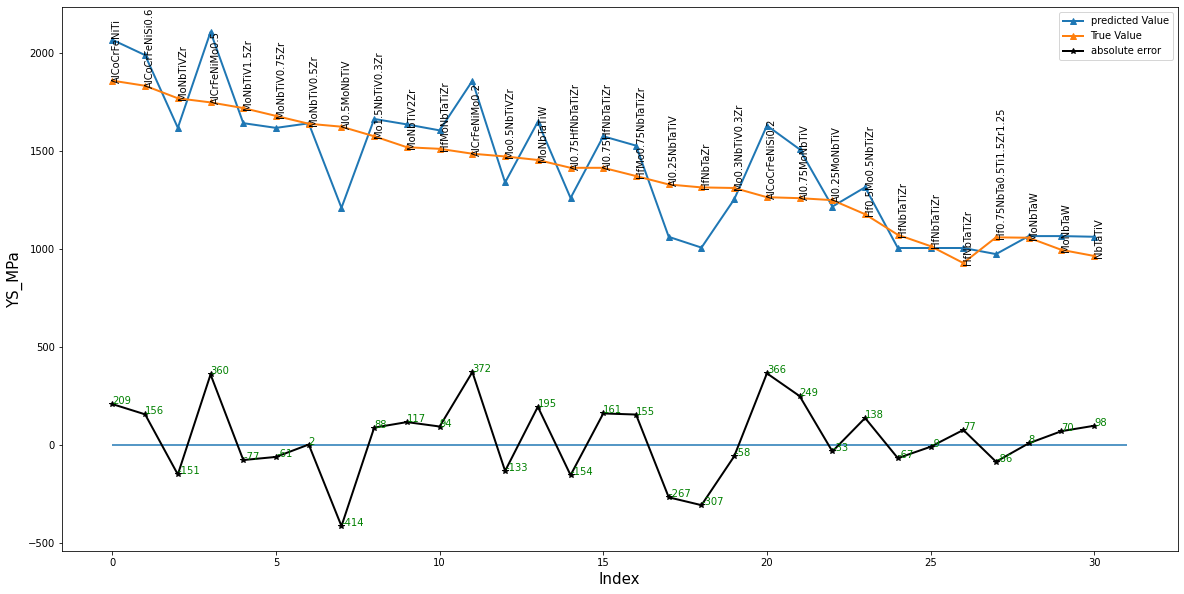

In [53]:
plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
# plt.plot(range(0,n),perror,marker='^',color='red',label='percentage error',lw=2)
plt.plot(range(0,n),aerror,marker='*',color='black',label='absolute error',lw=2)
plt.hlines(0,0,n)
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]),rotation=90)
# for i in range(0,n):
#     plt.annotate(round(perror.tolist()[i]),(i,perror.tolist()[i]),fontsize=20)
for i in range(0,n):
    plt.annotate(round(aerror.tolist()[i]),(i,aerror.tolist()[i]),fontsize=10,color='green')
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300) yhjg


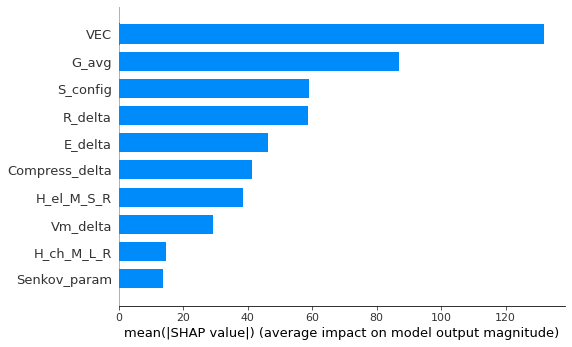

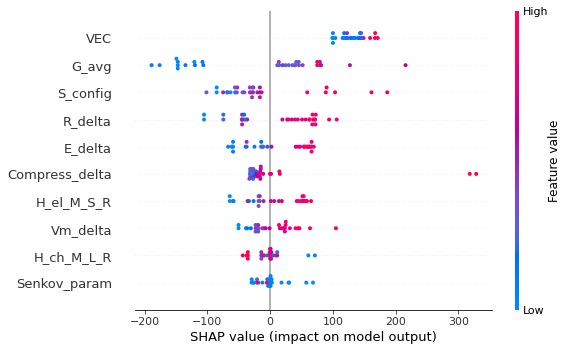

In [54]:
sorted_idx = RF.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

In [55]:
allFeats=[('Compress_avg',1), ('Tm_avg',1), ('H_avg',1), ('E_coh_avg',1), ('B_avg',1), ('density_avg',1),
       ('G_delta',1), ('Senkov_param',1), ('EN_Allen_avg',1), ('E_avg',1), ('B_delta',1), ('G_avg',1),
       ('VEC',1), ('R_cov_delta',1), ('H_ch_M_L_R',1), ('H_el_M_S_R',1), ('R_delta',1),
       ('E_coh_delta',1), ('S_config',1), ('Vm_delta',1), ('Compress_delta',0), ('E_delta',1)]
taken=[i[0] for i in allFeats if i[1]]
print(taken)

['Compress_avg', 'Tm_avg', 'H_avg', 'E_coh_avg', 'B_avg', 'density_avg', 'G_delta', 'Senkov_param', 'EN_Allen_avg', 'E_avg', 'B_delta', 'G_avg', 'VEC', 'R_cov_delta', 'H_ch_M_L_R', 'H_el_M_S_R', 'R_delta', 'E_coh_delta', 'S_config', 'Vm_delta', 'E_delta']


RMS error= 162.4299899550809
Absolute Error= 131.98696153846154
      R_delta  S_config       VEC  R_cov_delta  density_avg       Tm_avg  \
15   0.067409  0.013381  4.800000     0.048937     7.160000  2379.600000   
60   0.036978  0.013381  5.000000     0.037044     9.136000  2612.200000   
22   0.066303  0.013332  4.789474     0.048674     7.221053  2389.947368   
9    0.062925  0.015547  7.272727     0.068861     7.145455  1726.890000   
77   0.061956  0.012648  4.605263     0.047394     6.973684  2348.000000   
80   0.059565  0.014222  7.076923     0.040167     6.912692  1684.176923   
103  0.049710  0.013381  4.400000     0.037550     9.860000  2523.200000   
88   0.039782  0.011526  5.000000     0.036142     9.277500  2577.750000   
83   0.039049  0.012708  4.882353     0.049393     7.048235  2353.960000   
52   0.027284  0.013381  5.200000     0.030543    11.796000  2913.000000   
105  0.023393  0.011526  5.500000     0.031277    13.617500  3155.500000   
113  0.049710  0.013381 

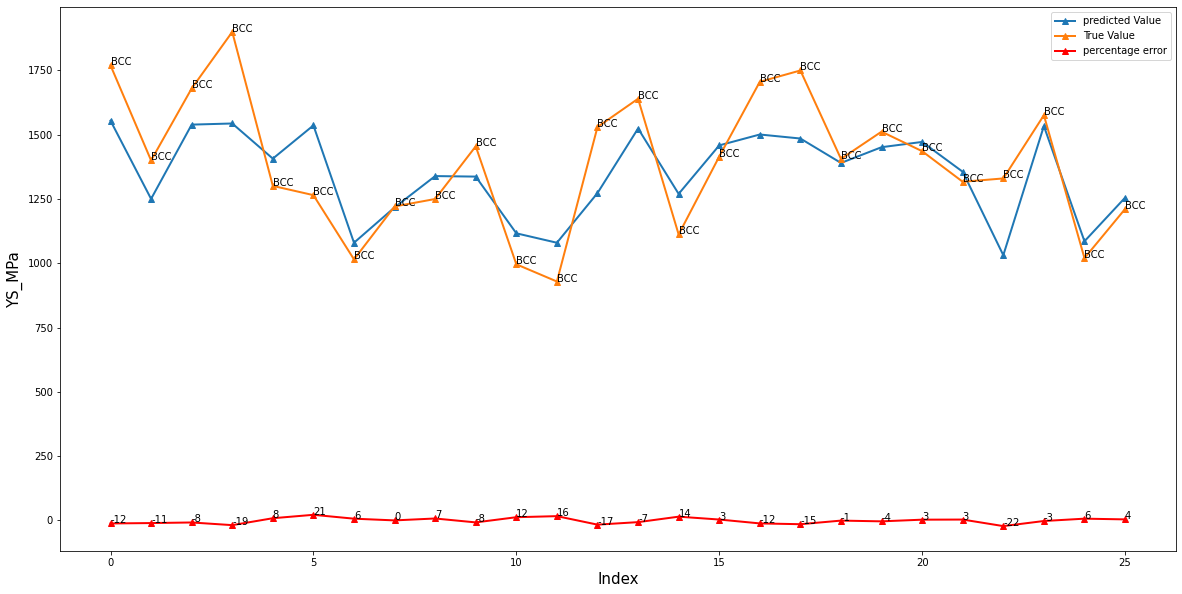

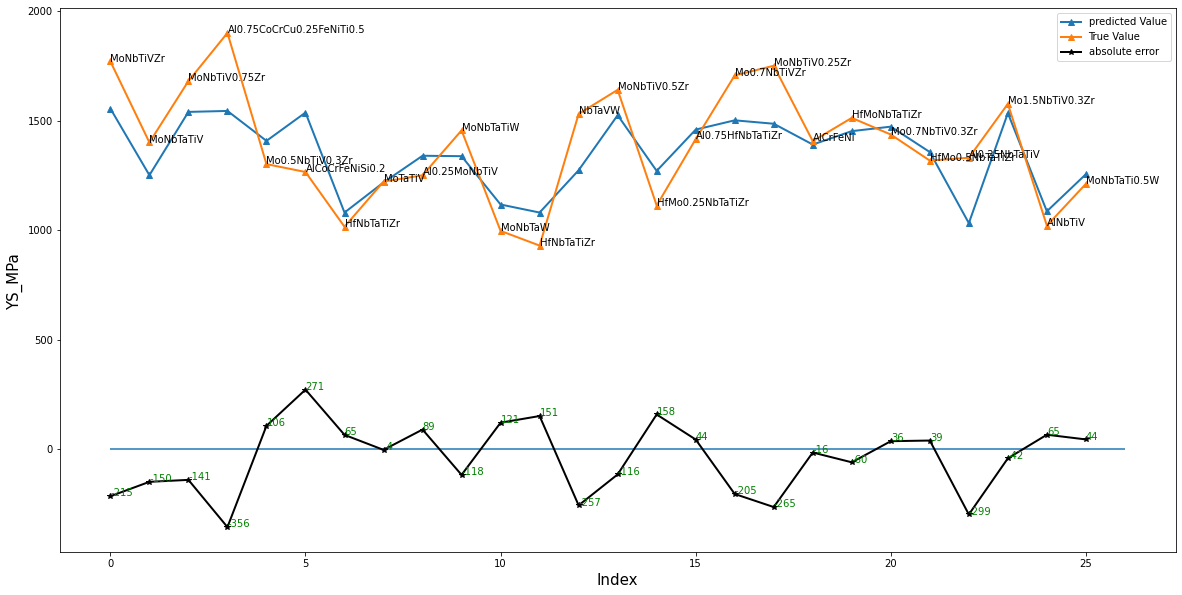

In [56]:
df=df[df['phases']=='BCC']
featuresTaken=[
            'R_delta','S_config','VEC','R_cov_delta','density_avg','Tm_avg','E_avg','E_delta',
            'G_avg','G_delta','B_avg','B_delta', 'Compress_avg', 'Compress_delta', 'EN_Allen_avg','H_avg', 'Vm_delta', 'E_coh_avg', 'E_coh_delta',
            ] 

df=df2
df=df[df['phases']=='BCC']
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
print(f'RMS error= {rms}\nAbsolute Error= {abserr}')
perror=(predict-y_test)*100/y_test #percentage Error


aerror=(predict-y_test); #absolute error

n=y_test.shape[0]

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),perror,marker='^',color='red',label='percentage error',lw=2)
# plt.plot(range(0,n),aerror,marker='*',color='black',label='absolute error',lw=2)
# plt.hlines(0,0,n)
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(perror.tolist()[i]),(i,perror.tolist()[i]),fontsize=10)
# for i in range(0,n):
#     plt.annotate(round(aerror.tolist()[i]),(i,aerror.tolist()[i]),fontsize=20,color='green')
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300) yhjg


plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
# plt.plot(range(0,n),perror,marker='^',color='red',label='percentage error',lw=2)
plt.plot(range(0,n),aerror,marker='*',color='black',label='absolute error',lw=2)
plt.hlines(0,0,n)
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(round(perror.tolist()[i]),(i,perror.tolist()[i]),fontsize=20)
for i in range(0,n):
    plt.annotate(round(aerror.tolist()[i]),(i,aerror.tolist()[i]),fontsize=10,color='green')
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
print(X_test)

In [57]:
##############################Predicting using shear modulus####################################################################

df_youngs_modulus=pd.read_csv('ShearModulus_using_youngsMod/youngs_to_shear_original.csv')
df_youngs_modulus.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df_youngs_modulus=df_youngs_modulus.dropna()
df_youngs_modulus=df_youngs_modulus.drop_duplicates()
df_youngs_modulus.columns


Index(['alloy_name', 'phases', 'youngs_mod_GPa', 'R_delta', 'S_config', 'VEC',
       'R_cov_delta', 'density_avg', 'Tm_avg', 'E_avg', 'E_delta', 'G_avg',
       'G_delta', 'B_avg', 'B_delta', 'Compress_avg', 'Compress_delta',
       'EN_Allen_avg', 'H_avg', 'Vm_delta', 'E_coh_avg', 'E_coh_delta',
       'Senkov_param', 'H_ch_M_L_R', 'H_el_M_S_R', 's_mod_GPa'],
      dtype='object')

In [58]:
featuresTaken=['R_delta', 'S_config', 'VEC',
       'R_cov_delta', 'density_avg', 'Tm_avg', 'E_avg', 'E_delta', 'G_avg',
       'G_delta', 'B_avg', 'B_delta', 'Compress_avg', 'Compress_delta',
       'EN_Allen_avg', 'H_avg', 'Vm_delta', 'E_coh_avg', 'E_coh_delta',
       'Senkov_param', 'H_ch_M_L_R', 'H_el_M_S_R']
X=df_youngs_modulus[featuresTaken]
y=df_youngs_modulus['s_mod_GPa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF_shear_mod_pred=RandomForestRegressor(n_estimators=1000)

RF_shear_mod_pred.fit(X_train,y_train)
predict=RF_shear_mod_pred.predict(X_test)
rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
percentage_error=np.mean(np.abs((y_test - predict) / y_test)) * 100
print(f'RMS error= {rms}\nAbsolute Error= {abserr}\nPercentage Error={percentage_error}')
perror=(predict-y_test)*100/y_test #percentage Error

aerror=(predict-y_test); #absolute error

RMS error= 82.259973218765
Absolute Error= 62.505252985715
Percentage Error=24.245815827836363


['Compress_avg', 'Tm_avg', 'H_avg', 'E_coh_avg', 'B_avg', 'density_avg', 'G_delta', 'Senkov_param', 'EN_Allen_avg', 'E_avg', 'B_delta', 'G_avg', 'VEC', 'R_cov_delta', 'H_ch_M_L_R', 'H_el_M_S_R', 'R_delta', 'E_coh_delta', 'S_config', 'Vm_delta', 'Compress_delta', 'E_delta']
RMS error= 159.0028306524761
Absolute Error= 127.94880769230768
Percentage Error=9.053693679348495


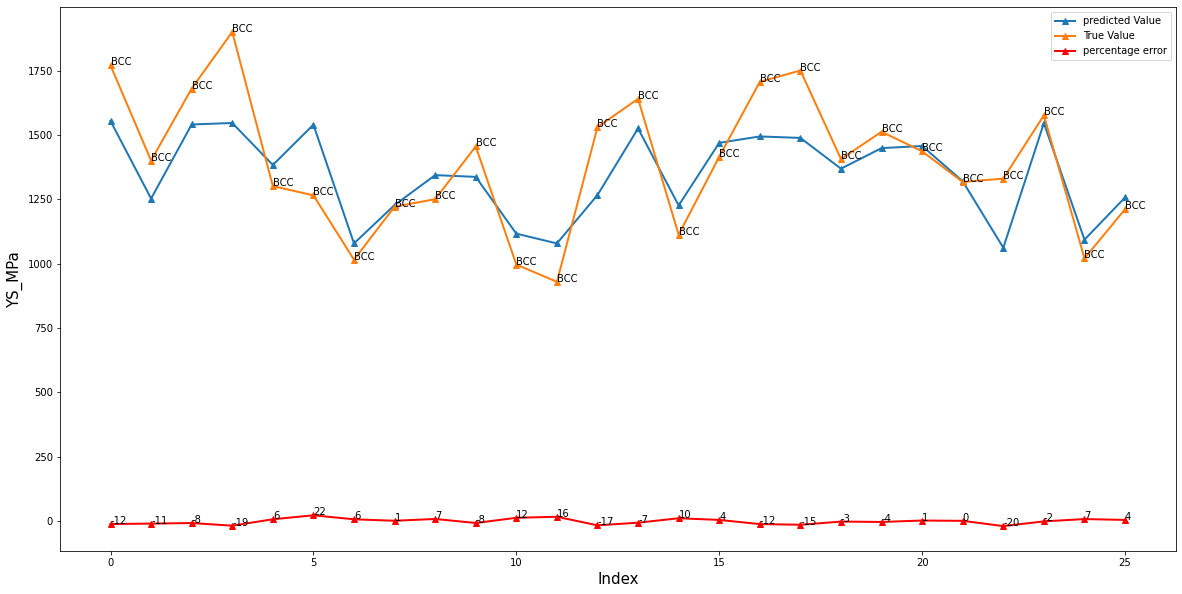

In [59]:
#Base Model for BCC#######

df=df[df['phases']!='FCC']
allFeats=[('Compress_avg',1), ('Tm_avg',1), ('H_avg',1), ('E_coh_avg',1), ('B_avg',1), ('density_avg',1),
       ('G_delta',1), ('Senkov_param',1), ('EN_Allen_avg',1), ('E_avg',1), ('B_delta',1), ('G_avg',1),
       ('VEC',1), ('R_cov_delta',1), ('H_ch_M_L_R',1), ('H_el_M_S_R',1), ('R_delta',1),
       ('E_coh_delta',1), ('S_config',1), ('Vm_delta',1), ('Compress_delta',1), ('E_delta',1)]
taken=[i[0] for i in allFeats if i[1]]
print(taken)
featuresTaken=[ 'EN_Allen_avg', 'E_avg', 'B_delta', 'G_avg',
       'VEC', 'R_cov_delta', 'H_ch_M_L_R', 'H_el_M_S_R', 'R_delta',
       'E_coh_delta', 'S_config', 'Vm_delta', 'Compress_delta', 'E_delta']

df=df2
df=df[df['phases']=='BCC']
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
#X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
percentage_error=np.mean(np.abs((y_test - predict) / y_test)) * 100
print(f'RMS error= {rms}\nAbsolute Error= {abserr}\nPercentage Error={percentage_error}')
perror=(predict-y_test)*100/y_test #percentage Error


aerror=(predict-y_test); #absolute error

n=y_test.shape[0]

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),perror,marker='^',color='red',label='percentage error',lw=2)
# plt.plot(range(0,n),aerror,marker='*',color='black',label='absolute error',lw=2)
# plt.hlines(0,0,n)
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(perror.tolist()[i]),(i,perror.tolist()[i]),fontsize=10)
# for i in range(0,n):
#     plt.annotate(round(aerror.tolist()[i]),(i,aerror.tolist()[i]),fontsize=20,color='green')
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300) yhjg

RMS error= 163.96349962345042
Absolute Error= 130.11323076923074
Percentage Error=9.211991975554913


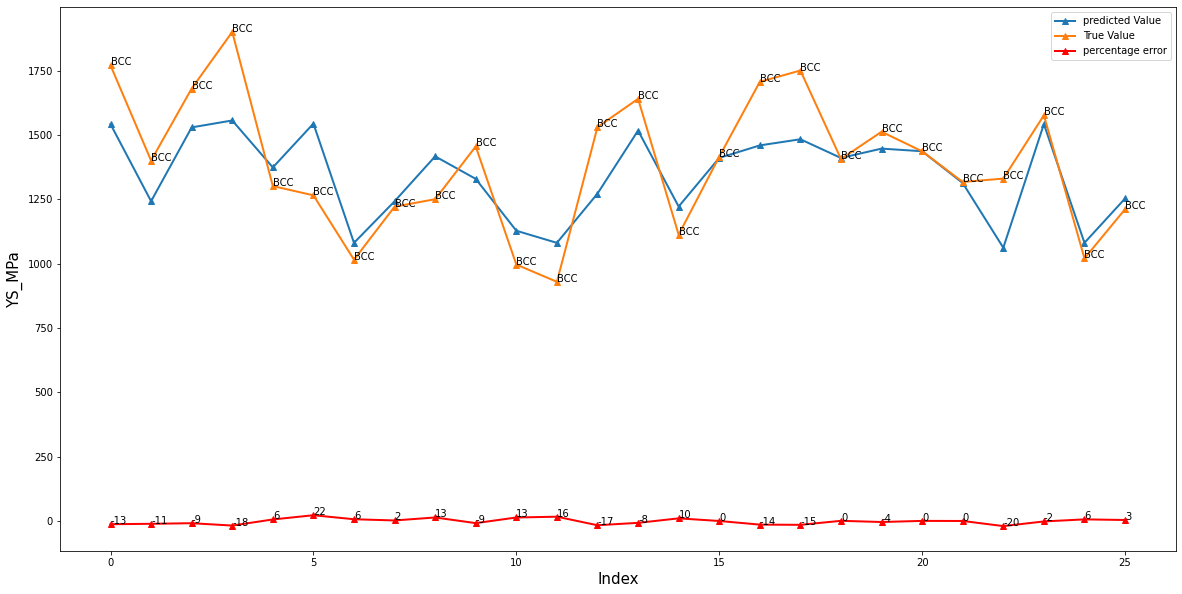

In [60]:
X=df.drop(columns=['alloy_name','phases','YS_MPa'])

shear_mod_predictions=RF_shear_mod_pred.predict(X) #predicting shear modulus using shear_mod_model for input in base

shear_mod_predictions
X['s_mod_GPa']=shear_mod_predictions


y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF_merged=RandomForestRegressor(n_estimators=1000)

RF_merged.fit(X_train,y_train)

predict=RF_merged.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
percentage_error=np.mean(np.abs((y_test - predict) / y_test)) * 100
print(f'RMS error= {rms}\nAbsolute Error= {abserr}\nPercentage Error={percentage_error}')
perror=(predict-y_test)*100/y_test #percentage Error


aerror=(predict-y_test); #absolute error

n=y_test.shape[0]

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),perror,marker='^',color='red',label='percentage error',lw=2)
# plt.plot(range(0,n),aerror,marker='*',color='black',label='absolute error',lw=2)
# plt.hlines(0,0,n)
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(perror.tolist()[i]),(i,perror.tolist()[i]),fontsize=10)
# for i in range(0,n):
#     plt.annotate(round(aerror.tolist()[i]),(i,aerror.tolist()[i]),fontsize=20,color='green')
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300) yhjg

In [61]:
###################convert using test run####################################

df_youngs_modulus=pd.read_csv('ShearModulus_using_youngsMod/test.csv')
df_youngs_modulus.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df_youngs_modulus=df_youngs_modulus.dropna()
df_youngs_modulus=df_youngs_modulus.drop_duplicates()
df_youngs_modulus.shape

(182, 26)

In [62]:
featuresTaken=['R_delta', 'S_config', 'VEC',
       'R_cov_delta', 'density_avg', 'Tm_avg', 'E_avg', 'E_delta', 'G_avg',
       'G_delta', 'B_avg', 'B_delta', 'Compress_avg', 'Compress_delta',
       'EN_Allen_avg', 'H_avg', 'Vm_delta', 'E_coh_avg', 'E_coh_delta',
       'Senkov_param', 'H_ch_M_L_R', 'H_el_M_S_R']
X=df_youngs_modulus[featuresTaken]
y=df_youngs_modulus['s_mod_GPa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF_shear_mod_pred=RandomForestRegressor(n_estimators=1000)

RF_shear_mod_pred.fit(X_train,y_train)
predict=RF_shear_mod_pred.predict(X_test)
rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
percentage_error=np.mean(np.abs((y_test - predict) / y_test)) * 100
print(f'RMS error= {rms}\nAbsolute Error= {abserr}\nPercentage Error={percentage_error}')
perror=(predict-y_test)*100/y_test #percentage Error

aerror=(predict-y_test); #absolute error

RMS error= 50.462331610759186
Absolute Error= 29.587128555272795
Percentage Error=7.43410820475803


['Compress_avg', 'Tm_avg', 'H_avg', 'E_coh_avg', 'B_avg', 'density_avg', 'G_delta', 'Senkov_param', 'EN_Allen_avg', 'E_avg', 'B_delta', 'G_avg', 'VEC', 'R_cov_delta', 'H_ch_M_L_R', 'H_el_M_S_R', 'R_delta', 'E_coh_delta', 'S_config', 'Vm_delta', 'Compress_delta', 'E_delta']
RMS error= 158.4188752271356
Absolute Error= 127.30584615384615
Percentage Error=9.018873152749874


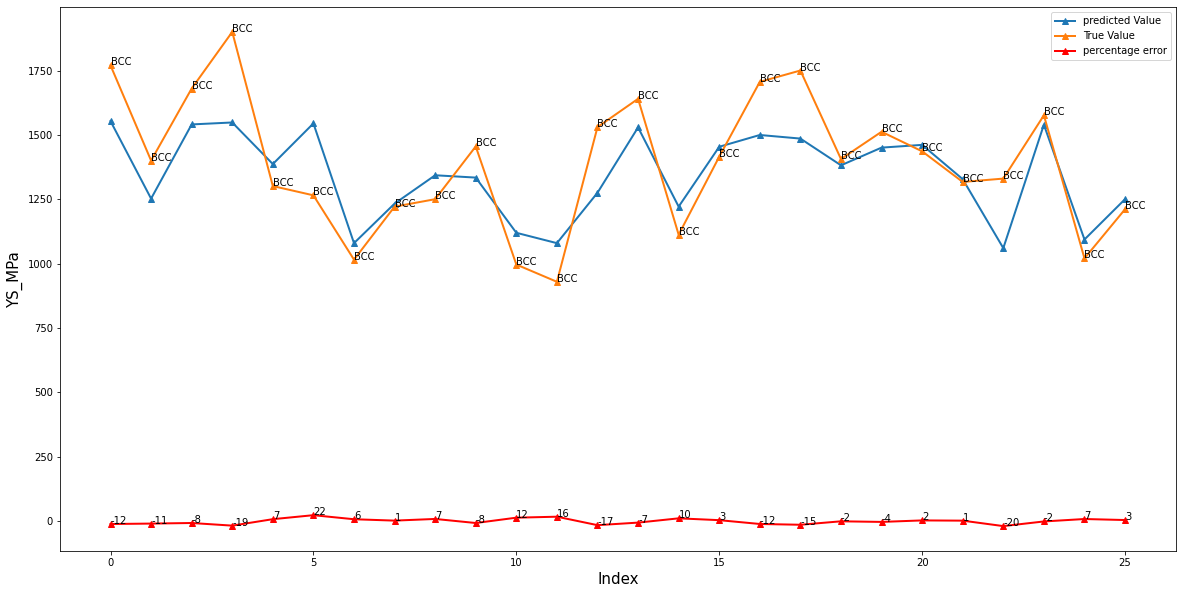

In [63]:
#Base Model for BCC#######

df=df[df['phases']=='FCC']
allFeats=[('Compress_avg',1), ('Tm_avg',1), ('H_avg',1), ('E_coh_avg',1), ('B_avg',1), ('density_avg',1),
       ('G_delta',1), ('Senkov_param',1), ('EN_Allen_avg',1), ('E_avg',1), ('B_delta',1), ('G_avg',1),
       ('VEC',1), ('R_cov_delta',1), ('H_ch_M_L_R',1), ('H_el_M_S_R',1), ('R_delta',1),
       ('E_coh_delta',1), ('S_config',1), ('Vm_delta',1), ('Compress_delta',1), ('E_delta',1)]
taken=[i[0] for i in allFeats if i[1]]
print(taken)
featuresTaken=[ 'EN_Allen_avg', 'E_avg', 'B_delta', 'G_avg',
       'VEC', 'R_cov_delta', 'H_ch_M_L_R', 'H_el_M_S_R', 'R_delta',
       'E_coh_delta', 'S_config', 'Vm_delta', 'Compress_delta', 'E_delta']

df=df2
df=df[df['phases']=='BCC']
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
#X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=1000)

RF.fit(X_train,y_train)

predict=RF.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
percentage_error=np.mean(np.abs((y_test - predict) / y_test)) * 100
print(f'RMS error= {rms}\nAbsolute Error= {abserr}\nPercentage Error={percentage_error}')
perror=(predict-y_test)*100/y_test #percentage Error


aerror=(predict-y_test); #absolute error

n=y_test.shape[0]

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),perror,marker='^',color='red',label='percentage error',lw=2)
# plt.plot(range(0,n),aerror,marker='*',color='black',label='absolute error',lw=2)
# plt.hlines(0,0,n)
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(perror.tolist()[i]),(i,perror.tolist()[i]),fontsize=10)
# for i in range(0,n):
#     plt.annotate(round(aerror.tolist()[i]),(i,aerror.tolist()[i]),fontsize=20,color='green')
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()


RMS error= 157.58366315450442
Absolute Error= 126.99903846153848
Percentage Error=8.986816101515618


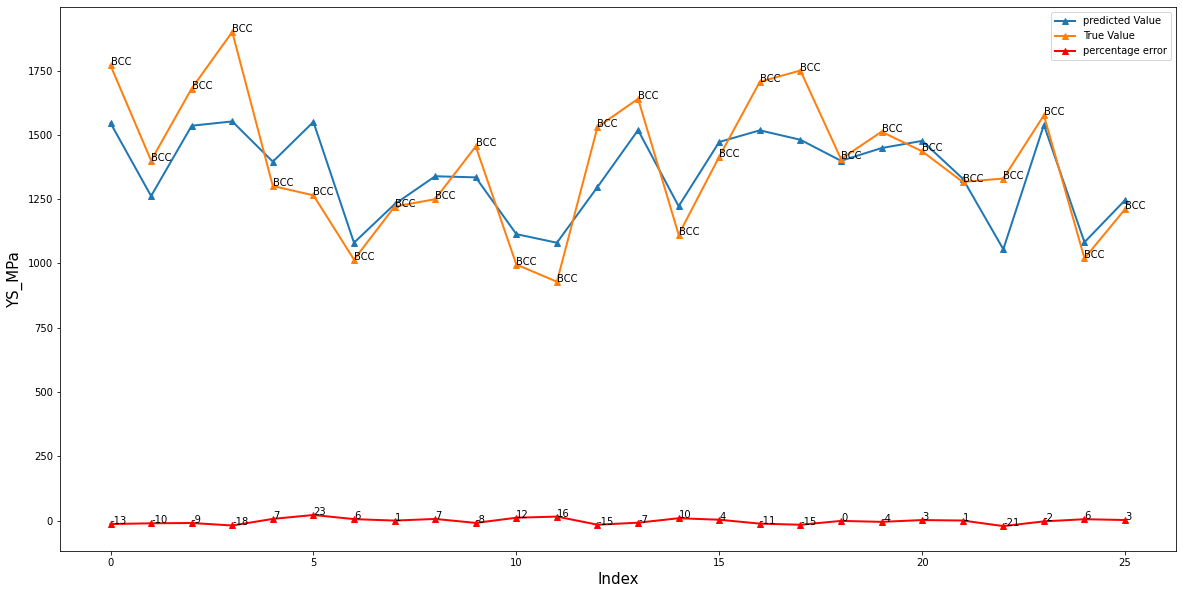

In [64]:
X=df.drop(columns=['alloy_name','phases','YS_MPa'])

shear_mod_predictions=RF_shear_mod_pred.predict(X) #predicting shear modulus using shear_mod_model for input in base

shear_mod_predictions
X['s_mod_GPa']=shear_mod_predictions

X['s_mod_GPa']=shear_mod_predictions

y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

RF_merged=RandomForestRegressor(n_estimators=1000)

RF_merged.fit(X_train,y_train)

predict=RF_merged.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
percentage_error=np.mean(np.abs((y_test - predict) / y_test)) * 100
print(f'RMS error= {rms}\nAbsolute Error= {abserr}\nPercentage Error={percentage_error}')
perror=(predict-y_test)*100/y_test #percentage Error


aerror=(predict-y_test); #absolute error

n=y_test.shape[0]

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),perror,marker='^',color='red',label='percentage error',lw=2)
# plt.plot(range(0,n),aerror,marker='*',color='black',label='absolute error',lw=2)
# plt.hlines(0,0,n)
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(perror.tolist()[i]),(i,perror.tolist()[i]),fontsize=10)
# for i in range(0,n):
#     plt.annotate(round(aerror.tolist()[i]),(i,aerror.tolist()[i]),fontsize=20,color='green')
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()
#plt.savefig('Test11Feb1.png',dpi=300) yhjg

['Compress_avg', 'Tm_avg', 'H_avg', 'E_coh_avg', 'B_avg', 'density_avg', 'G_delta', 'Senkov_param', 'EN_Allen_avg', 'E_avg', 'B_delta', 'G_avg', 'VEC', 'R_cov_delta', 'H_ch_M_L_R', 'H_el_M_S_R', 'R_delta', 'E_coh_delta', 'S_config', 'Vm_delta', 'Compress_delta', 'E_delta']
RMS error= 173.50877372621792
Absolute Error= 136.23645457144067
Percentage Error=9.540202584224202


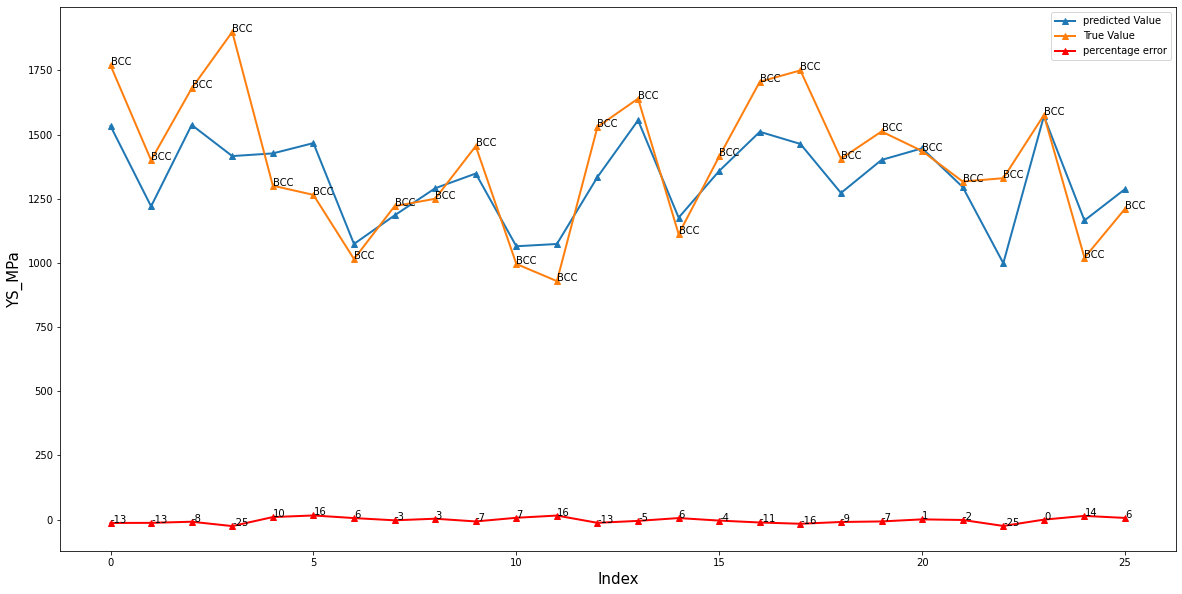

In [65]:
#Base Model for BCC using gradient boosting regressor#######

df=df[df['phases']=='FCC']
allFeats=[('Compress_avg',1), ('Tm_avg',1), ('H_avg',1), ('E_coh_avg',1), ('B_avg',1), ('density_avg',1),
       ('G_delta',1), ('Senkov_param',1), ('EN_Allen_avg',1), ('E_avg',1), ('B_delta',1), ('G_avg',1),
       ('VEC',1), ('R_cov_delta',1), ('H_ch_M_L_R',1), ('H_el_M_S_R',1), ('R_delta',1),
       ('E_coh_delta',1), ('S_config',1), ('Vm_delta',1), ('Compress_delta',1), ('E_delta',1)]
taken=[i[0] for i in allFeats if i[1]]
print(taken)
featuresTaken=[ 'EN_Allen_avg', 'E_avg', 'B_delta', 'G_avg',
       'VEC', 'R_cov_delta', 'H_ch_M_L_R', 'H_el_M_S_R', 'R_delta',
       'E_coh_delta', 'S_config', 'Vm_delta', 'Compress_delta', 'E_delta']

df=df2
df=df[df['phases']=='BCC']
X=df.drop(columns=['alloy_name','phases','YS_MPa'])
#X=df[featuresTaken]
y=df['YS_MPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()

GBR.fit(X_train,y_train)

predict=GBR.predict(X_test)

rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
abserr=metrics.mean_absolute_error(predict,y_test)
percentage_error=np.mean(np.abs((y_test - predict) / y_test)) * 100
print(f'RMS error= {rms}\nAbsolute Error= {abserr}\nPercentage Error={percentage_error}')
perror=(predict-y_test)*100/y_test #percentage Error


aerror=(predict-y_test); #absolute error

n=y_test.shape[0]

plt.figure(figsize=(20,10))
plt.plot(range(0,n),predict,label='predicted Value',marker='^',lw=2)
plt.plot(range(0,n),y_test,label='True Value',marker='^',lw=2)
plt.plot(range(0,n),perror,marker='^',color='red',label='percentage error',lw=2)
# plt.plot(range(0,n),aerror,marker='*',color='black',label='absolute error',lw=2)
# plt.hlines(0,0,n)
for i in range(0,n):
    plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['phases'].values[0],(i,y_test.tolist()[i]))
# for i in range(0,n):
#     plt.annotate(df[df['YS_MPa']==y_test.tolist()[i]]['alloy_name'].values[0],(i,y_test.tolist()[i]))
for i in range(0,n):
    plt.annotate(round(perror.tolist()[i]),(i,perror.tolist()[i]),fontsize=10)
# for i in range(0,n):
#     plt.annotate(round(aerror.tolist()[i]),(i,aerror.tolist()[i]),fontsize=20,color='green')
plt.xlabel('Index',fontsize=15)
plt.ylabel('YS_MPa',fontsize=15)
#plt.text(3,5,bbox={'fontsize': '10'})
plt.legend()

In [66]:
df=df2;
df=df[df['phases']=='BCC']
X=df.drop(columns=['alloy_name','phases','YS_MPa'])

shear_mod_predictions=RF_shear_mod_pred.predict(X) #predicting shear modulus using shear_mod_model for input in base

shear_mod_predictions
df['s_mod_GPa']=shear_mod_predictions
df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


alloy_name phases  YS_MPa   R_delta  S_config  \
9        Al0.75CoCrCu0.25FeNiTi0.5    BCC    1900  0.062925  0.015547   
11                    AlCoCrFeNiTi    BCC    1860  0.071247  0.014897   
12                 AlCoCrFeNiSi0.6    BCC    1834  0.063447  0.014778   
13                 AlCoCrFeMo0.1Ni    BCC    1804  0.056901  0.013921   
15                       MoNbTiVZr    BCC    1770  0.067409  0.013381   
..                             ...    ...     ...       ...       ...   
110                   Al0.6MoTaTiV    BCC     962  0.038056  0.013242   
112                Mo0.1NbTiV0.3Zr    BCC     932  0.059647  0.011621   
113                     HfNbTaTiZr    BCC     929  0.049710  0.013381   
114                     NbTiV0.3Zr    BCC     866  0.058761  0.010836   
115  Hf0.4Nb1.54Ta1.54Ti0.89Zr0.63    BCC     822  0.043592  0.012435   

          VEC  R_cov_delta  density_avg       Tm_avg       E_avg  ...  \
9    7.272727     0.068861     7.145455  1726.890000  166.481818  ...   
11   6.666667     0.081989     6.665000  1727.220000  158.700000  ...   
12   6.857143     0.042650     6.585357  1684.378571  163.821429  ...   
13   7.176471     0.046205     7.156863  1707.807843  173.176471  ...   
15   4.800000     0.048937     7.160000  2379.600000  146.200000  ...   
..        ...          ...          ...          ...         ...  ...   
110  4.739130     0.067266     8.419565  2363.259130  170.895652  ...   
112  4.441176     0.046388     6.594118  2283.647059  101.500000  ...   
113  4.400000     0.037550     9.860000  2523.200000  119.400000  ...   
114  4.393939     0.045960     6.484848  2265.121212   94.575758  ...   
115  4.616000     0.031945    10.379060  2674.656000  126.776000  ...   

     Compress_delta  EN_Allen_avg        H_avg  Vm_delta  E_coh_avg  \
9          0.420404      1.732727   898.818182  0.184337   4.190909   
11         0.425371      1.693333  1044.666667  0.201495   4.241667   
12         0.445060      1.773571   880.000000  0.161826   4.174643   
13         0.477379      1.750392   695.294118  0.168557   4.172941   
15         0.395868      1.422000   944.600000  0.178793   6.160000   
..              ...           ...          ...       ...        ...   
110        0.465445      1.453478   858.739130  0.093631   5.894348   
112        0.305179      1.387059  1185.294118  0.157242   6.160294   
113        0.307792      1.322000  1152.600000  0.124061   6.642000   
114        0.287304      1.384545  1212.727273  0.155682   6.140303   
115        0.341635      1.351760   851.878000  0.108535   6.992360   

     E_coh_delta  Senkov_param  H_ch_M_L_R  H_el_M_S_R   s_mod_GPa  
9       0.098592      1.858016      -14.45        5.19  475.315001  
11      0.104475      1.204018      -21.37        6.96  368.842225  
12      0.094608      1.515953      -16.42        4.08  485.202671  
13      0.127730      1.932860      -12.30        4.23  513.117245  
15      0.160220     12.685701       -2.51        5.87  390.902295  
..           ...           ...         ...         ...         ...  
110     0.261358      3.176985       -9.85        2.15  457.578511  
112     0.175468     32.363008        0.82        4.46  303.890426  
113     0.170238     12.692708        2.66        3.37  292.958391  
114     0.177675     17.285516        1.42        4.27  283.879518  
115     0.168699     13.631361        2.44        2.29  328.712896  

[77 rows x 26 columns]

In [67]:
df.to_csv('shear_modulus_predictions_on_BCC_alloys_using_MPEA_dataset.csv');

In [77]:
df.to_excel('shear_modulus_predictions_on_BCC_alloys_using_MPEA_dataset.xlsx');

In [69]:
df_r_avg=pd.read_csv('Extracting_R_avg/r_avg.csv')

In [70]:
df_r_avg

Unnamed: 0                 alloy_name       phases  YS_Mpa   R_delta  \
0             0         AlMo0.5NbTa0.5TiZr       BCC+B2    2197  0.050047   
1             1              Al0.158CuMnNi          FCC     330  0.038881   
2             2  Al0.25CoCrCu0.75FeNiTi0.5          FCC     750  0.053862   
3             3               Al0.25CoFeNi          FCC     158  0.038915   
4             4              Al0.25MoNbTiV          BCC    1250  0.039049   
..          ...                        ...          ...     ...       ...   
204         204                     NbTaVW          BCC    1530  0.033175   
205         205                 NbTiV0.3Zr          BCC     866  0.058761   
206         206                   NbTiV2Zr  BCC+BCC+BCC     918  0.072823   
207         207                    NbTiVZr          BCC    1104  0.068739   
208         208                    NbTiVZr          BCC    1105  0.068739   

     S_config       VEC  R_cov_delta  density_avg       Tm_avg  ...  \
0    0.014533  4.300000     0.092381     7.120000  2169.164000  ...   
1    0.010328  9.016466     0.039156     8.102153  1504.776618  ...   
2    0.015547  8.000000     0.069254     7.714545  1765.462727  ...   
3    0.010686  8.538462     0.026554     8.093846  1704.716923  ...   
4    0.012708  4.882353     0.049393     7.048235  2353.960000  ...   
..        ...       ...          ...          ...          ...  ...   
204  0.011526  5.250000     0.036034    12.567500  2977.500000  ...   
205  0.010836  4.393939     0.045960     6.484848  2265.121212  ...   
206  0.011076  4.600000     0.051298     6.320000  2237.200000  ...   
207  0.011526  4.500000     0.050204     6.400000  2250.750000  ...   
208  0.011526  4.500000     0.050204     6.400000  2250.750000  ...   

     Compress_delta  EN_Allen_avg        H_avg  Vm_delta  E_coh_avg  \
0          0.395006      1.425000   843.000000  0.136472   5.904000   
1          0.493093      1.815826   330.967701  0.100021   3.605326   
2          0.318591      1.754545   917.181818  0.163384   4.200000   
3          0.364146      1.822308   717.769231  0.124579   4.294615   
4          0.399327      1.457059   908.647059  0.097169   5.975882   
..              ...           ...          ...       ...        ...   
204        0.239003      1.437500   365.000000  0.102854   7.470000   
205        0.287304      1.384545  1212.727273  0.155682   6.140303   
206        0.305239      1.434000  1014.600000  0.198884   5.858000   
207        0.301063      1.410000  1110.750000  0.183863   5.995000   
208        0.301063      1.410000  1110.750000  0.183863   5.995000   

     E_coh_delta  Senkov_param  H_ch_M_L_R  H_el_M_S_R     R_avg  
0       0.274757      1.902559      -16.57        3.10  1.463000  
1       0.170048      4.453152       -3.49        1.35  1.300171  
2       0.094338      3.801666       -7.22        3.91  1.279545  
3       0.062618      3.082315       -5.91        1.98  1.260769  
4       0.209108      4.944352       -6.05        2.18  1.394706  
..           ...           ...         ...         ...       ...  
204     0.178571      7.396040       -4.64        2.94  1.387500  
205     0.177675     17.285516        1.42        4.27  1.480606  
206     0.165529     23.376073       -1.06        6.44  1.426000  
207     0.173468    235.830543       -0.11        5.85  1.452500  
208     0.173468    235.830543       -0.11        5.85  1.452500  

[209 rows x 27 columns]

In [71]:
def clean_dataset(df):
    df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
    df=df.dropna()
    df=df.drop_duplicates()
    return df

In [72]:
df_r_avg=clean_dataset(df_r_avg)

In [73]:
df_r_avg[df_r_avg['phases']=='BCC'].shape

(94, 26)

In [74]:
def get_peirels_nabarro_stress(r,G):
    """
    Formula used: Tp(Pierels Nabarro Stress)= (G/(1-poissons))*exp(-4*pi*chai/b)
    d=avg interplanar spacing {110},{112}
    d=(a/root(2) + a/root(6))/2
    b=0.866a = a/2<hkl> =a/2<111> slip direction
    a=4*r_avg/root(3) for BCC structure
    """
    a=4*r/(math.sqrt(3))
    d=(a/sqrt(2))+(a/sqrt(3))
    d=d/2  
    chai=(d/(2*(1-0.33)))
    b=0.866*a
    intra_exp=(-1*4*math.pi*chai)/b
    pre_exp=G/(1-0.33)
    p_n_s=pre_exp*math.exp(intra_exp)*1000 #for making into mega pascal
    return p_n_s

In [75]:
def youngs_modulus_model():
    """
    info:The model takes in the old base model parameter creates a shear_modulus model and predicts on it
    input parameters: youngs_modulus_dataset, features for X
    return parameters:youngs_modulus_model
    """
    print("Youngs Modulus Model Results\n")
    X=df_youngs_modulus[featuresTaken]
    y=df_youngs_modulus['s_mod_gpa']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    Rf=RandomForestRegressor(n_estimators=1000)

    RF.fit(X_train,y_train)
    predict=RF.predict(X_test)
    rms=np.sqrt(metrics.mean_squared_error(predict,y_test))
    abserr=metrics.mean_absolute_error(predict,y_test)
    percentage_error=np.mean(np.abs((y_test - predict) / y_test)) * 100
    print(f'RMS error= {rms}\nAbsolute Error= {abserr}\nPercentage Error={percentage_error}')
    perror=(predict-y_test)*100/y_test #percentage Error

    aerror=(predict-y_test); #absolute error
    
    return RF